In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dates2num(dates_in):
    dates_out = []
    for period in dates_in:
        year = float(period.split('/')[1])
        month = float(period.split('/')[0])
        dates_out.append(year+month/12)
    return np.asarray(dates_out)

def movingAverage(data, N=3):
    cumsum, moving_aves = [0], []

    for i, x in enumerate(data, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
    return moving_aves

<h2>Load Data</h2>

In [2]:
NHSdata = np.load('NHSwaiting.npy', allow_pickle=True)
names = NHSdata[0]
dates = dates2num(NHSdata[1])
attendance = NHSdata[2]
waiting = NHSdata[3]

<h2>Generate Plots</h2>

Small: Herts Urgent Care (Ascots Lane)


C:\Users\David\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Small: South Tyneside And Sunderland NHS Foundation Trust
Small: Hull University Teaching Hospitals NHS Trust
Small: St Helens And Knowsley Teaching Hospitals NHS Trust
Small: University Hospitals Plymouth NHS Trust


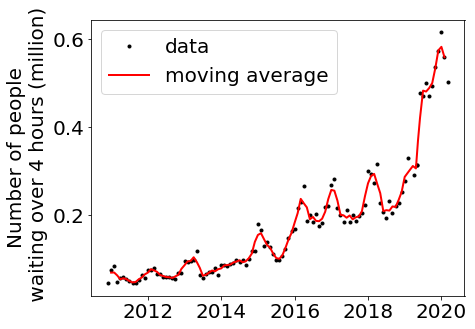

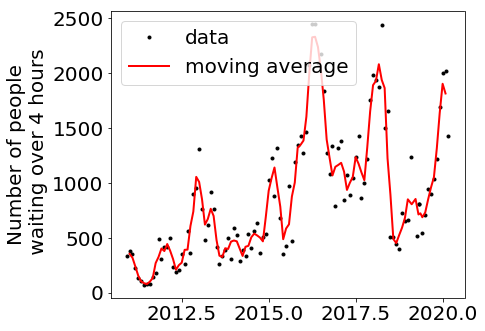

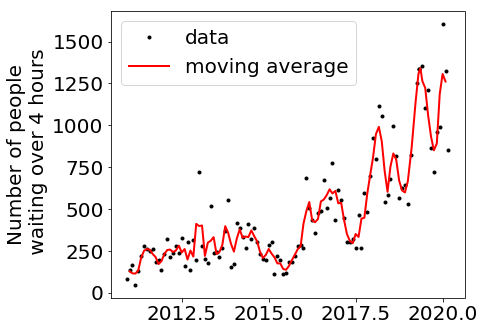

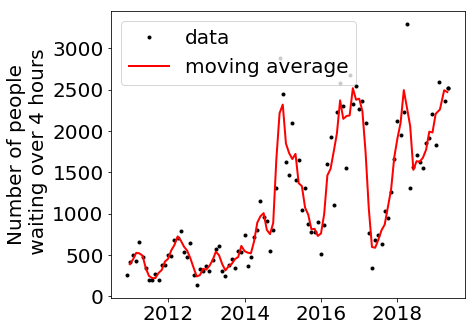

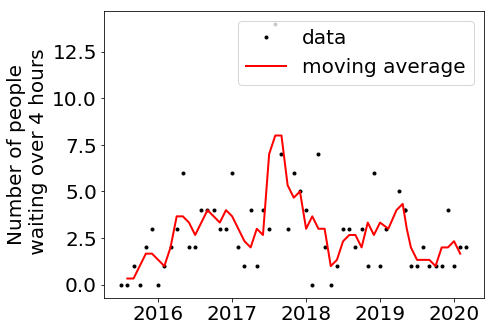

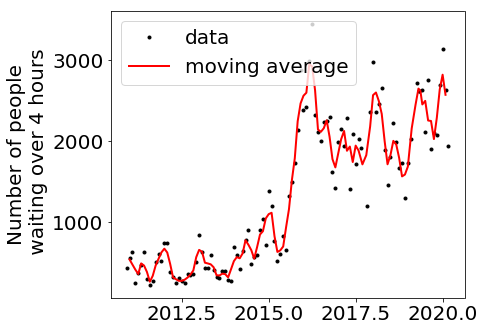

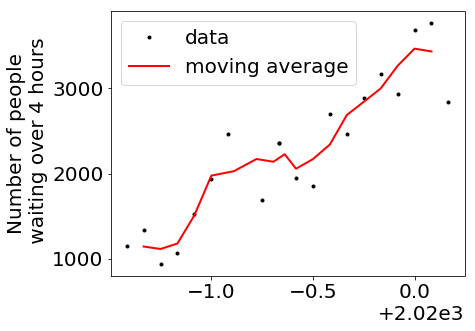

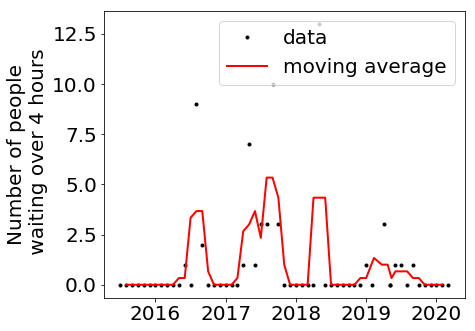

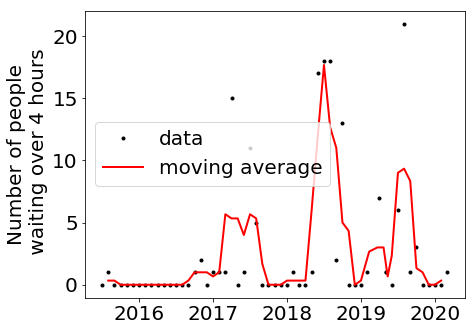

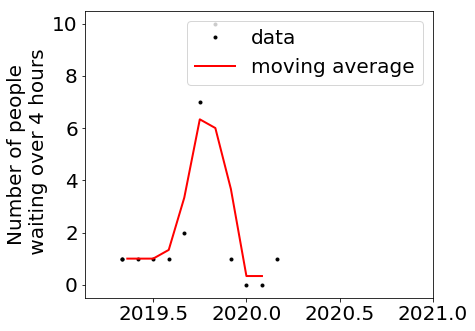

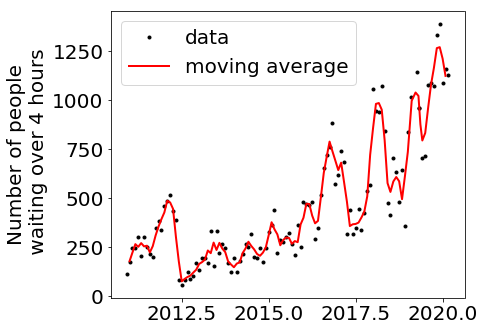

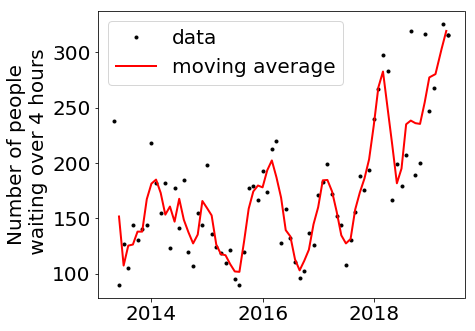

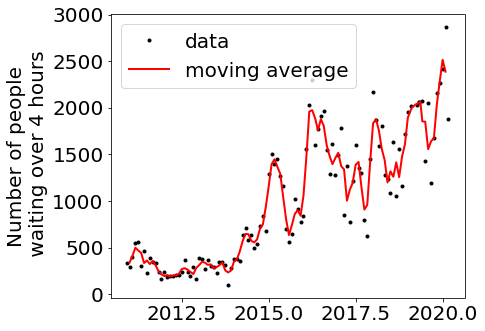

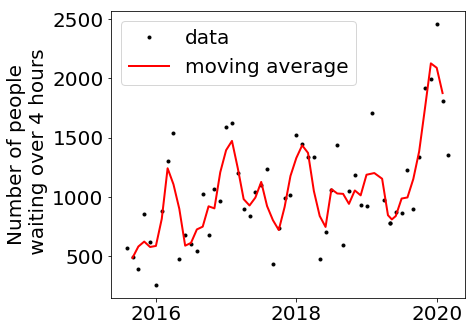

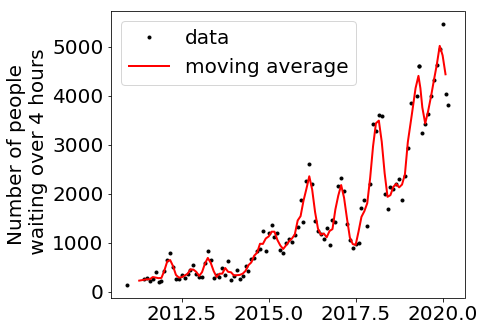

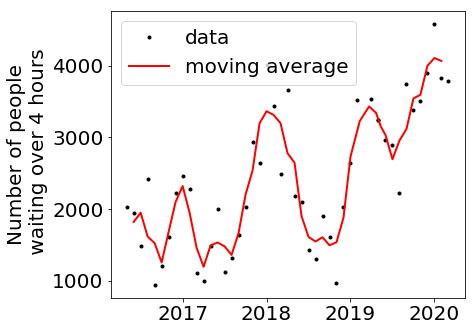

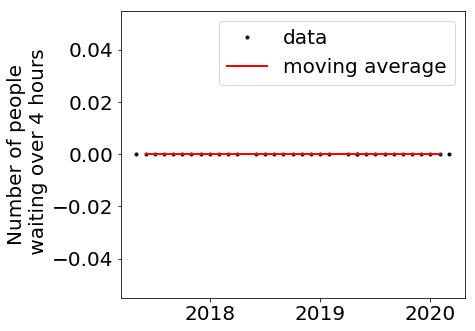

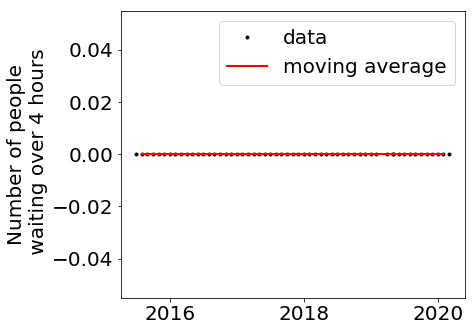

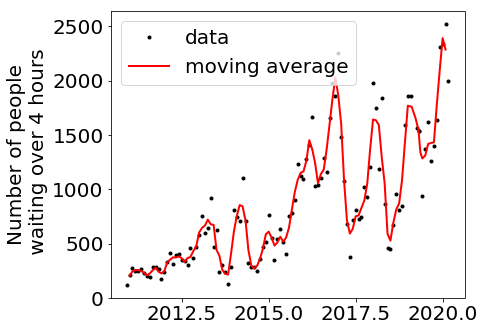

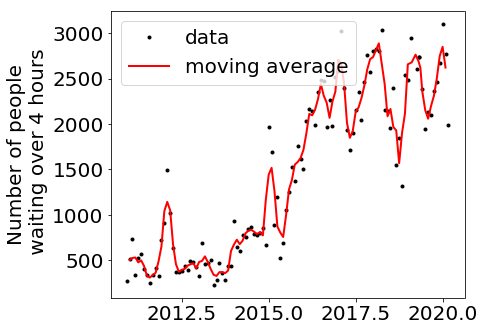

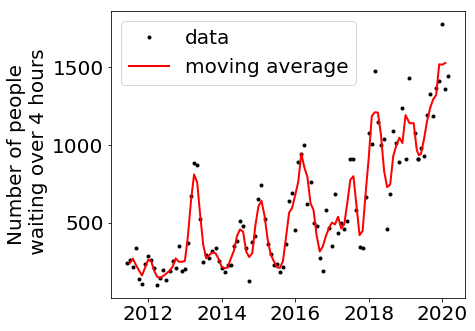

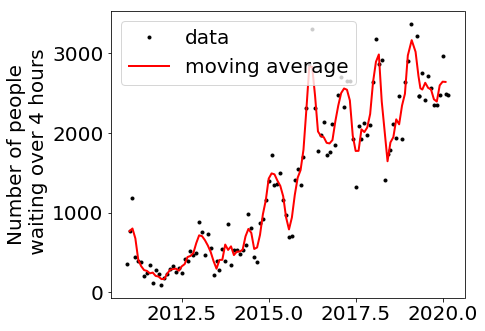

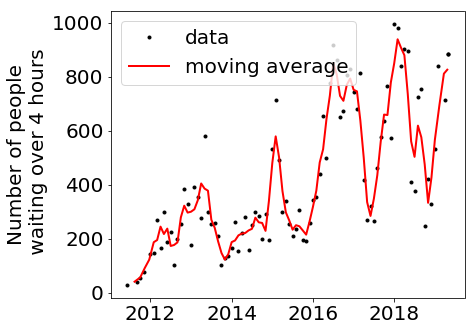

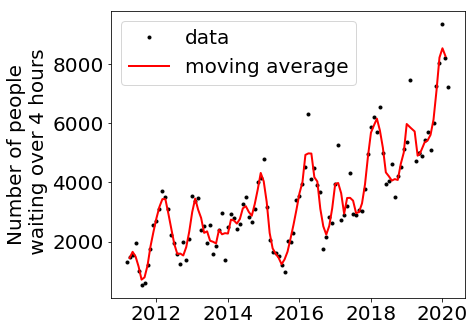

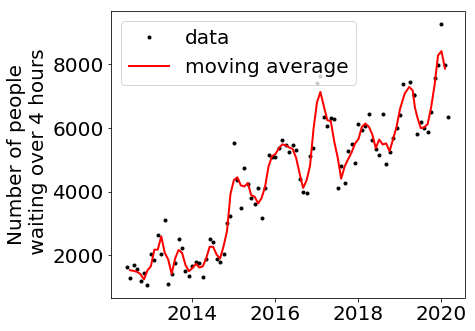

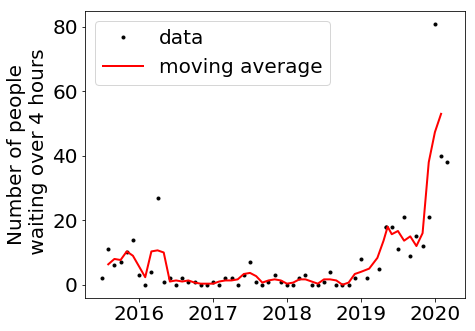

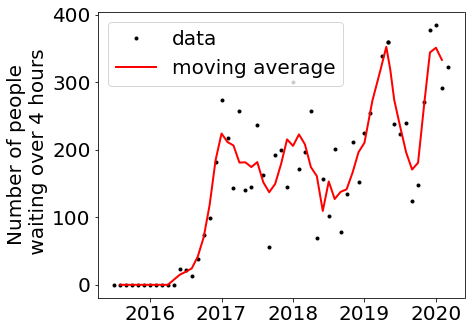

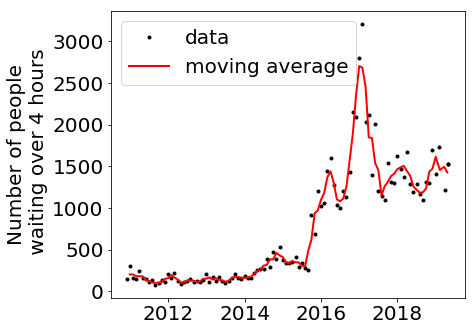

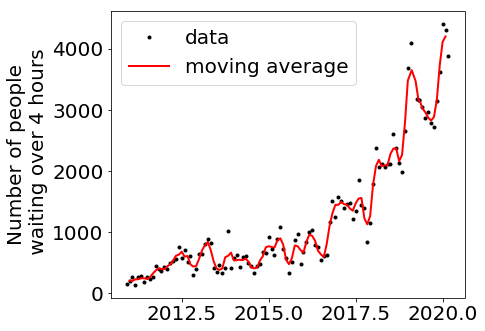

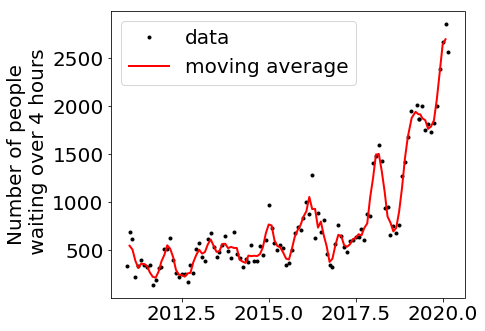

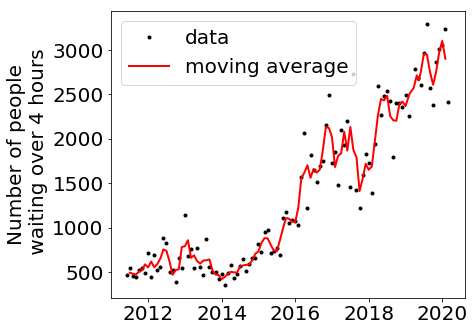

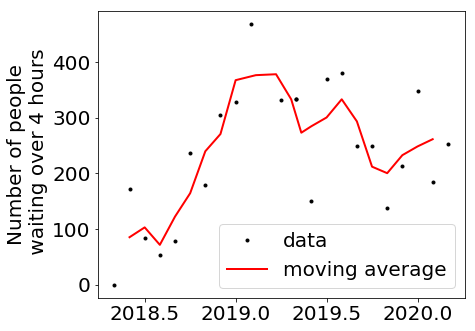

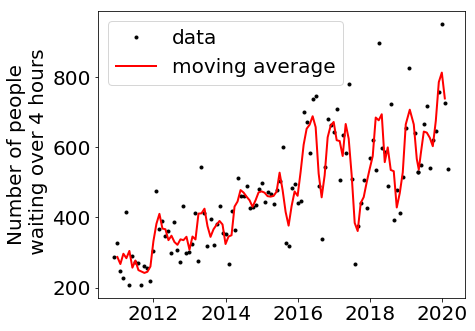

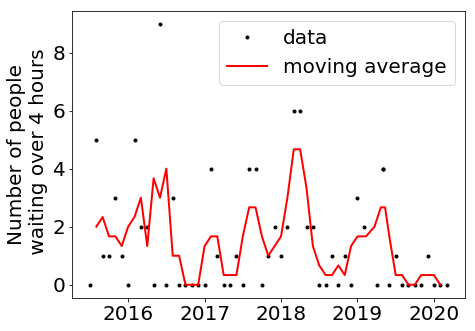

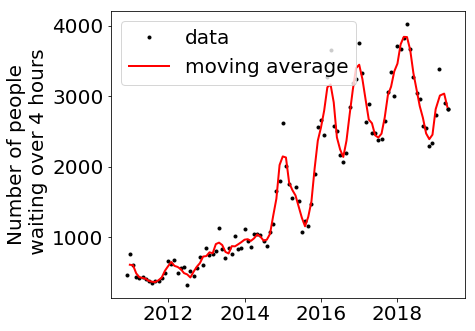

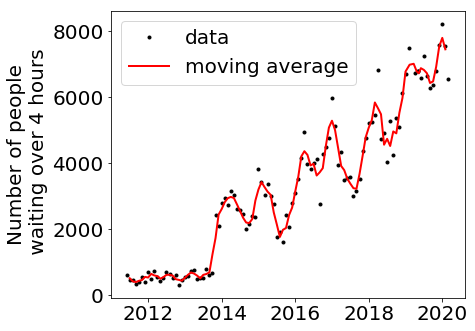

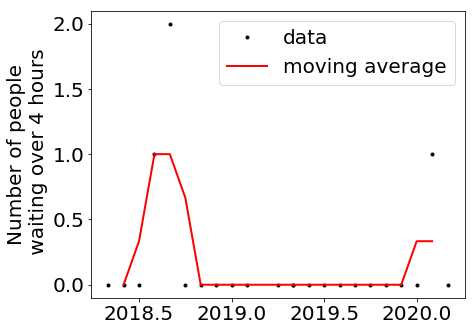

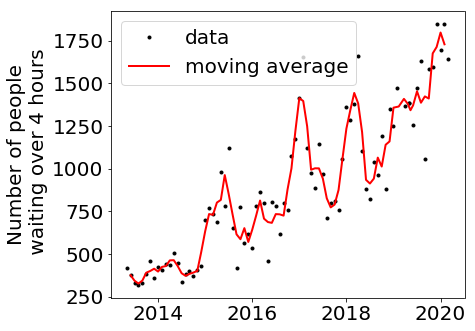

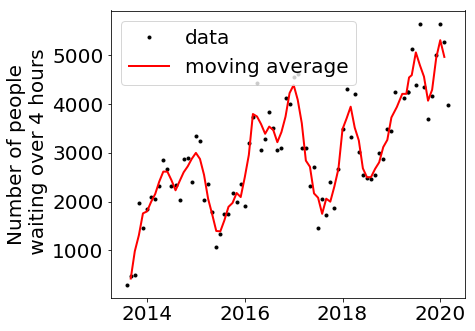

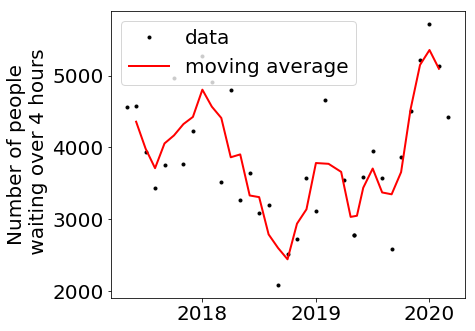

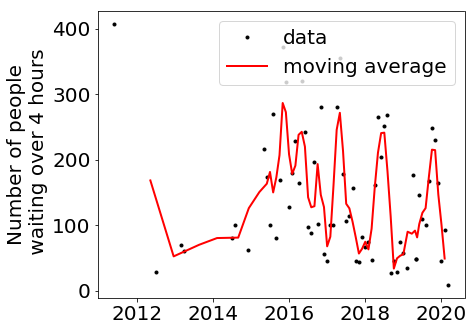

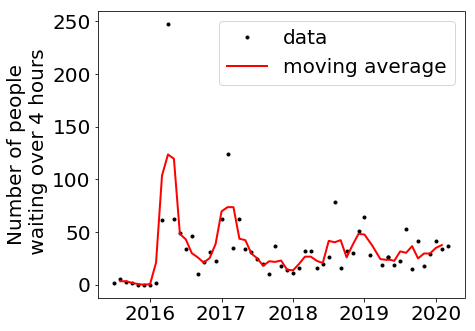

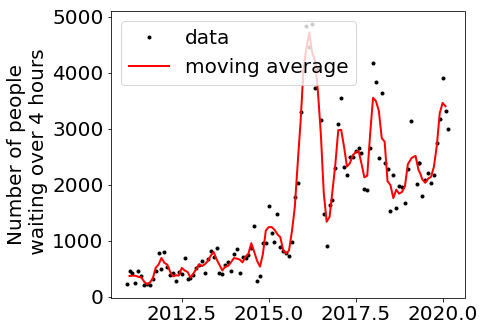

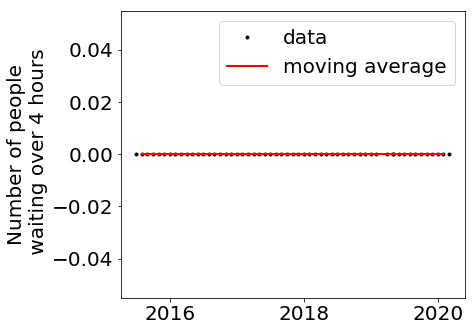

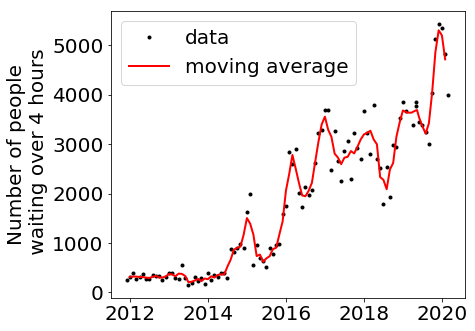

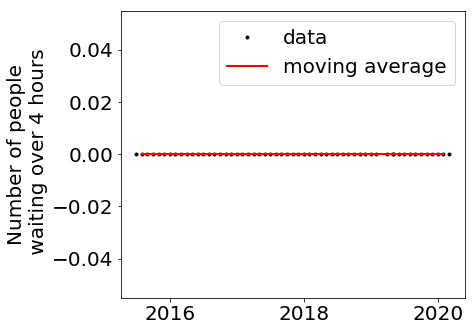

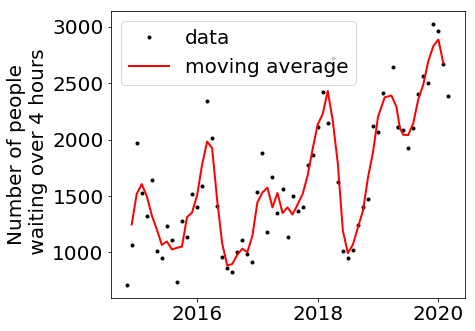

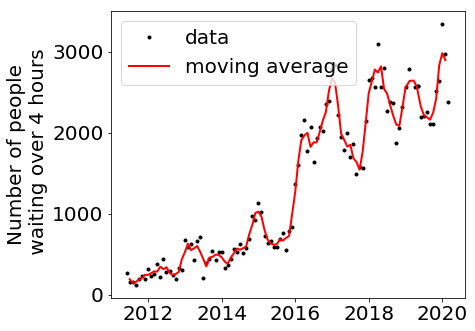

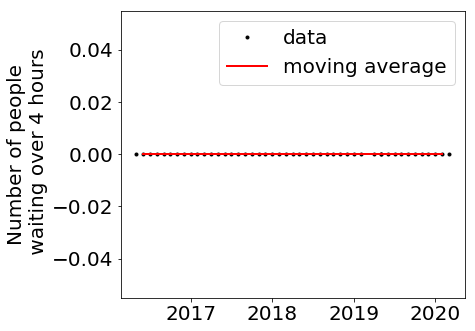

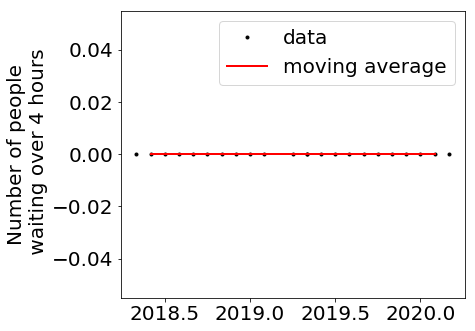

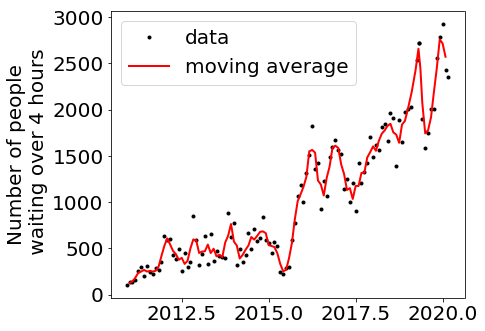

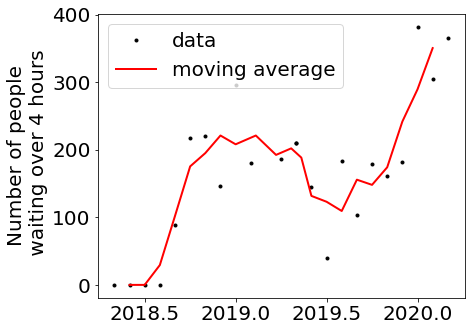

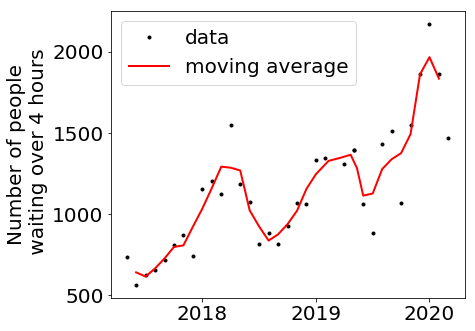

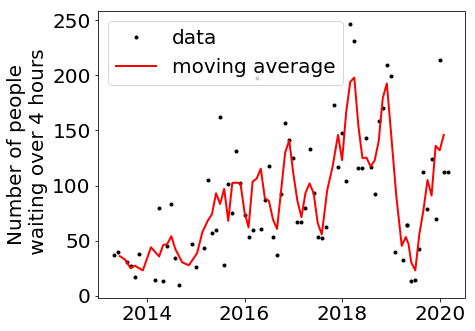

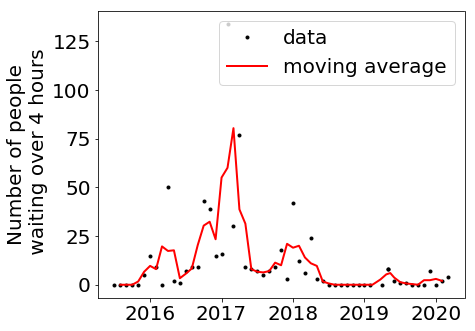

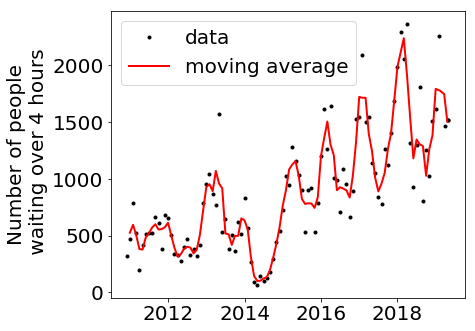

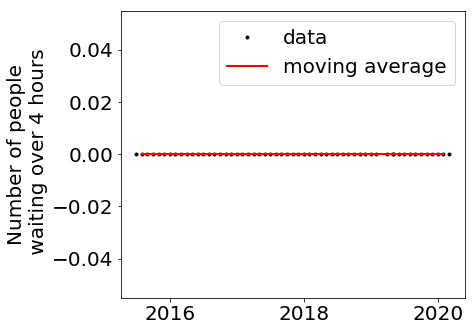

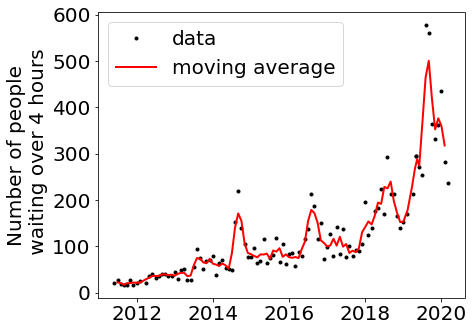

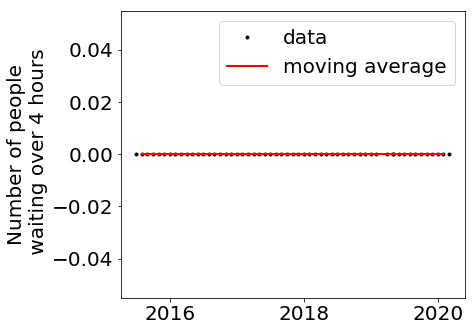

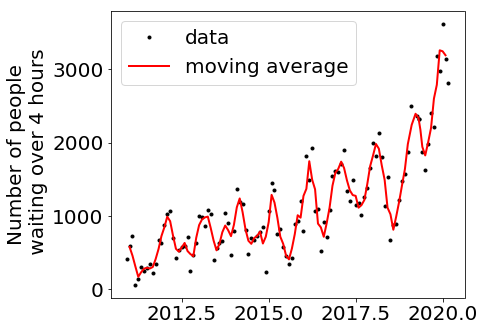

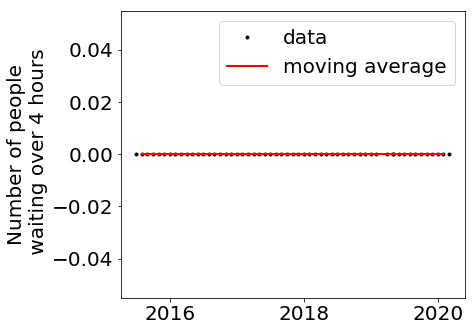

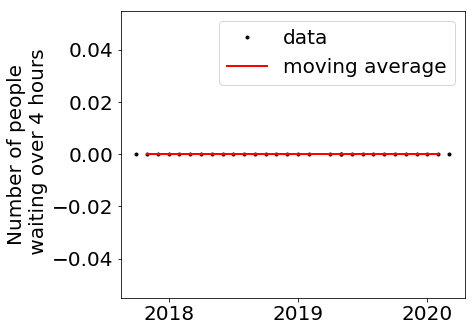

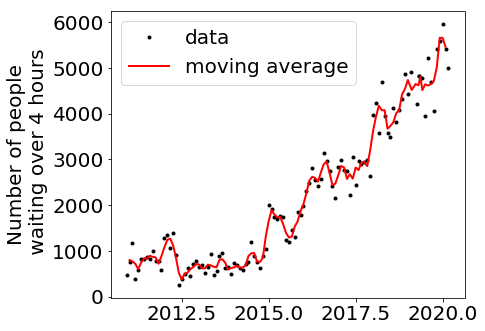

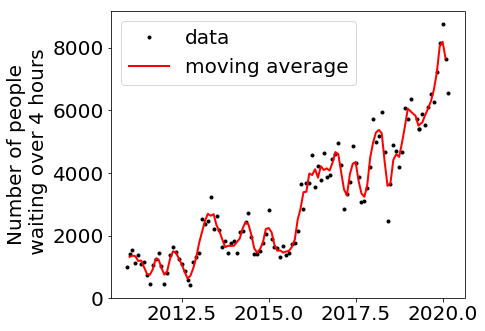

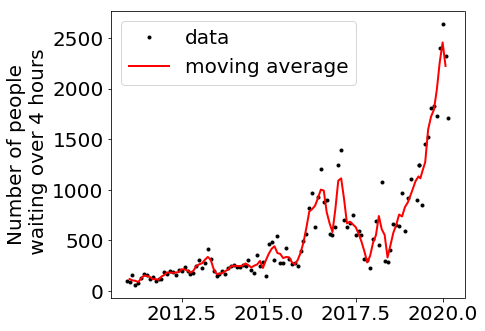

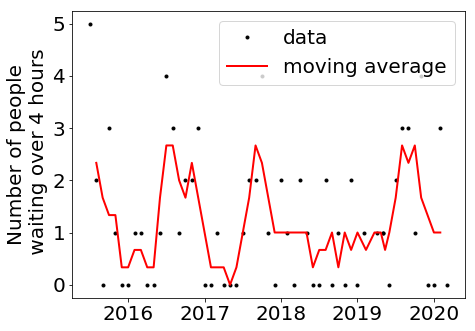

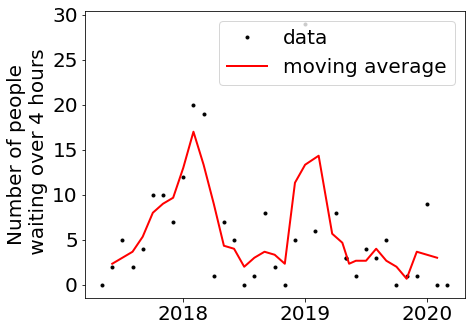

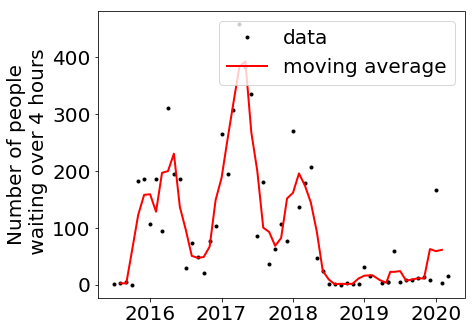

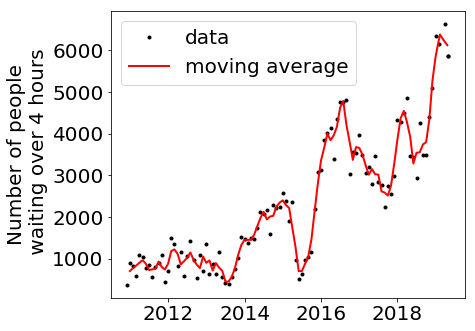

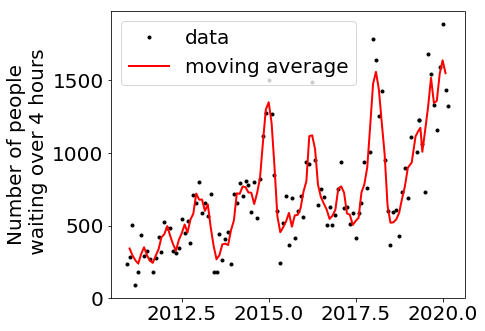

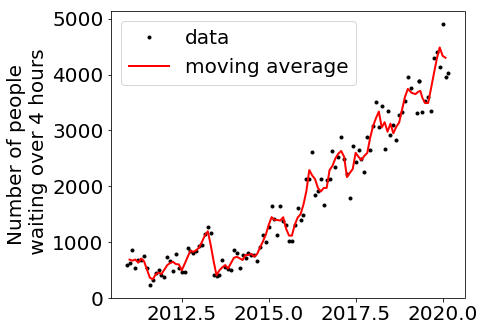

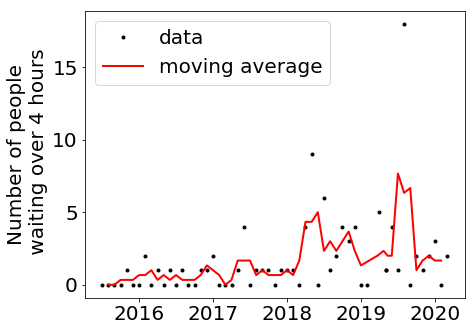

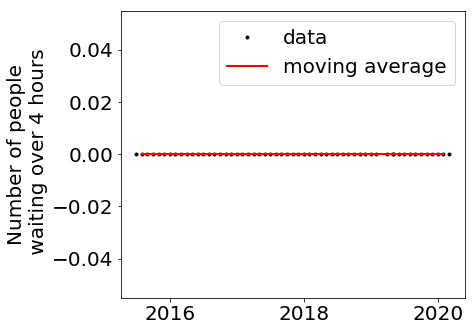

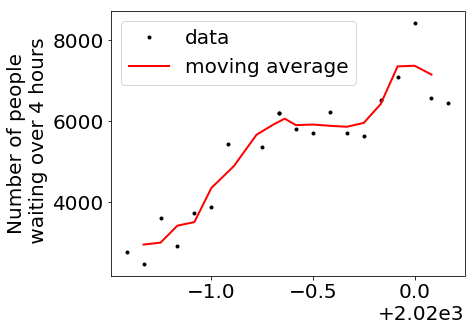

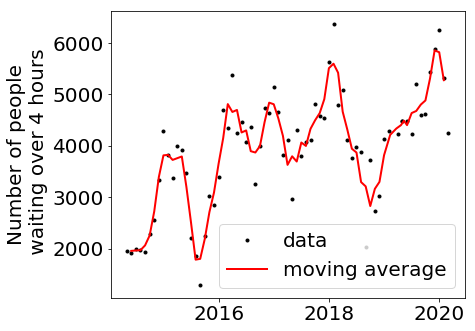

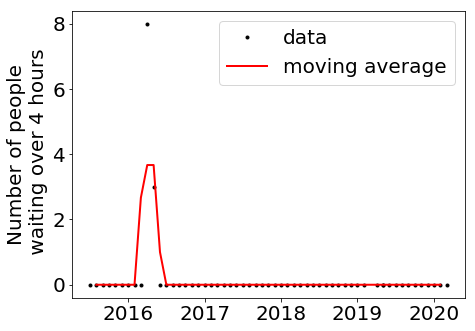

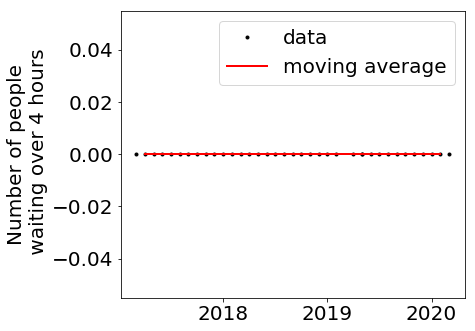

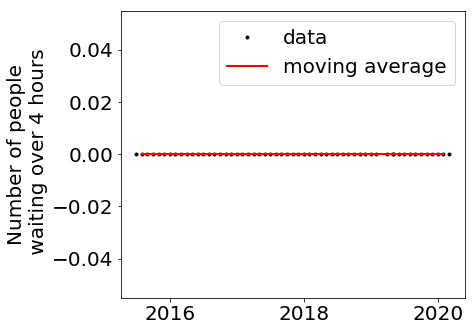

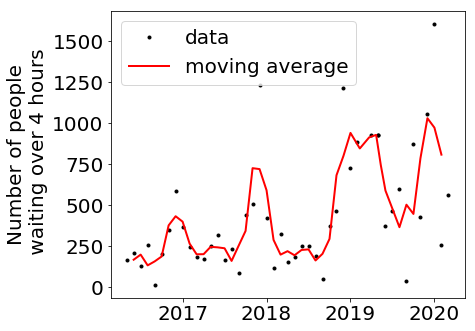

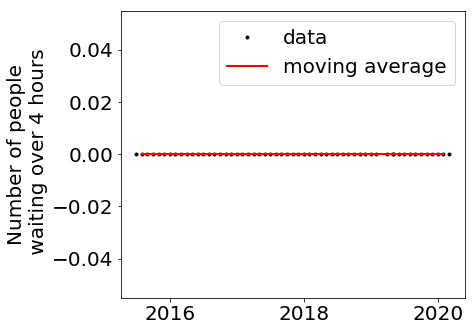

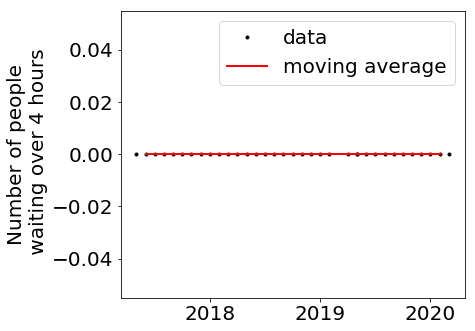

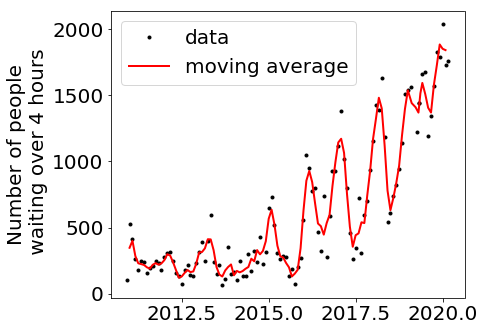

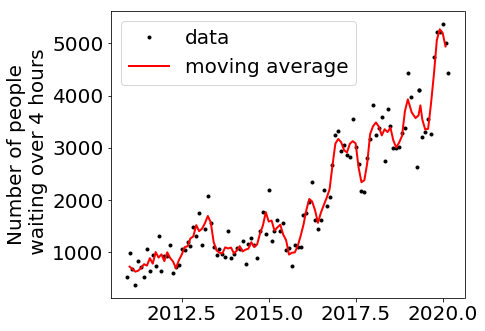

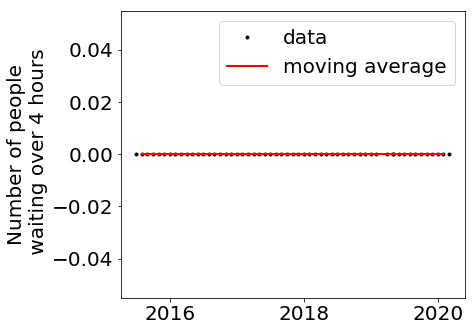

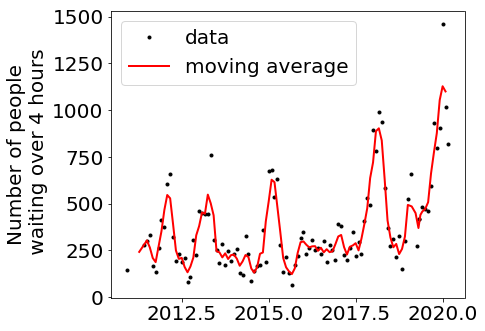

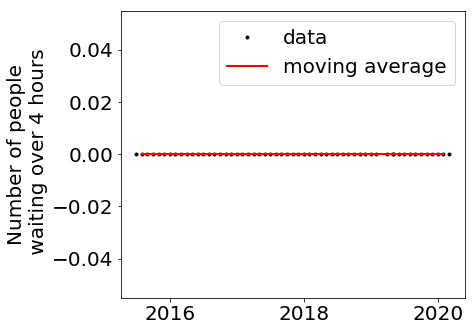

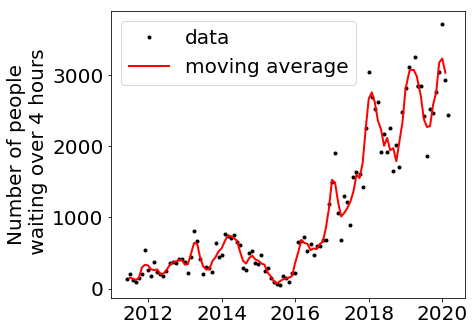

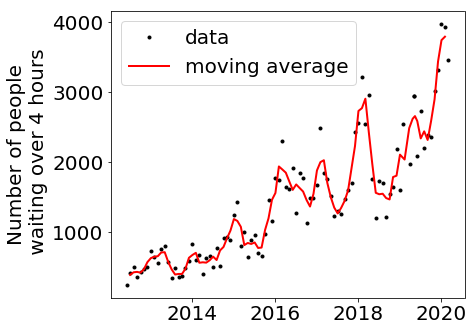

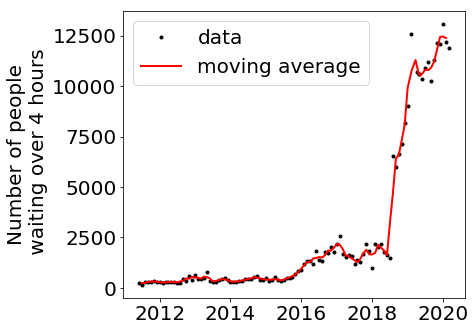

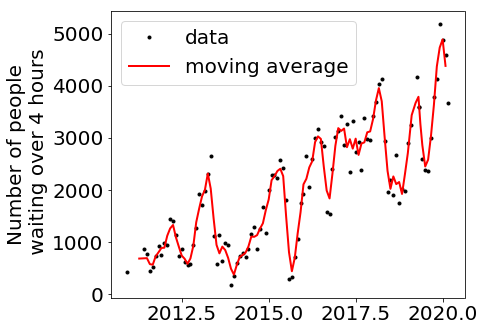

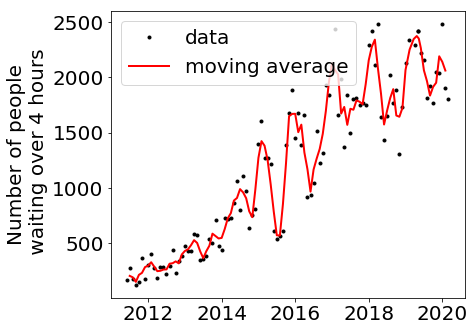

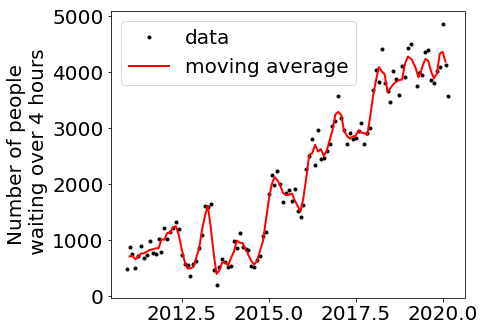

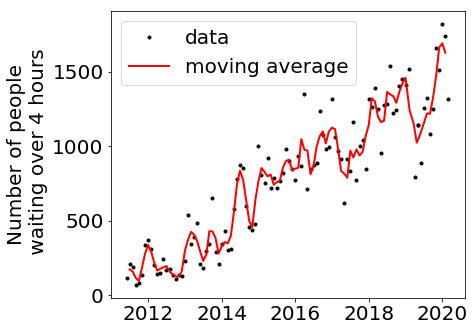

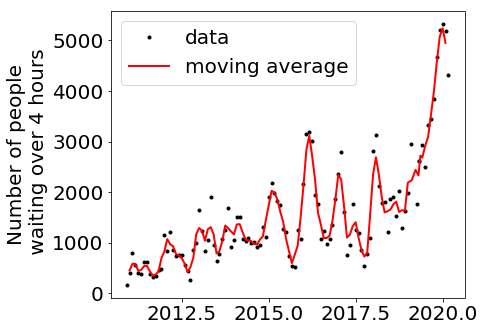

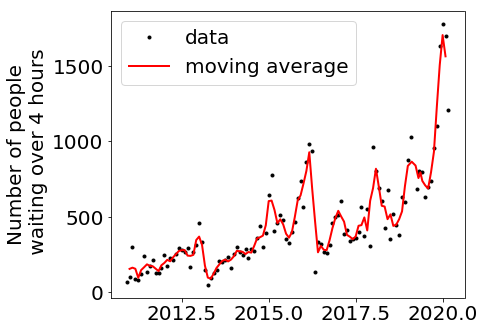

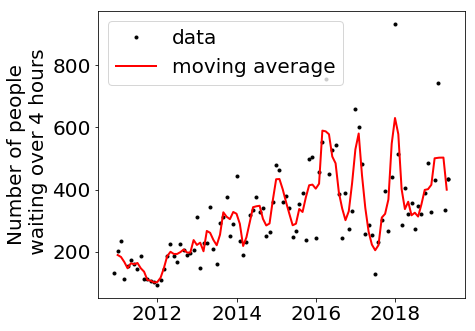

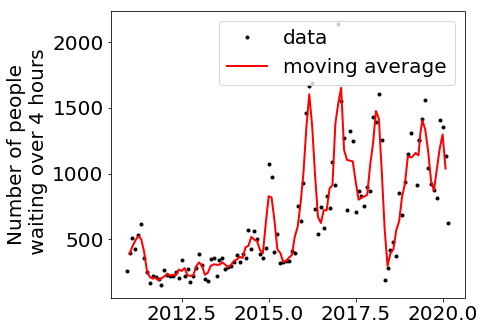

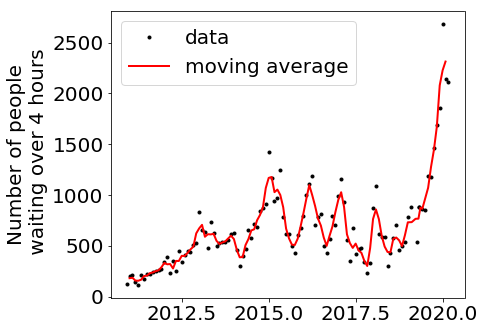

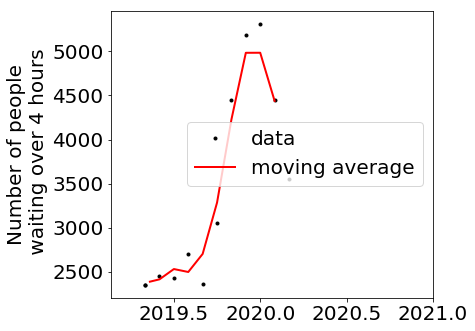

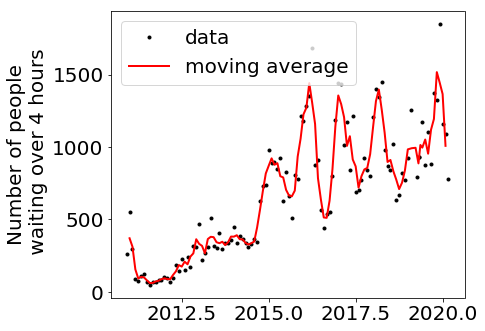

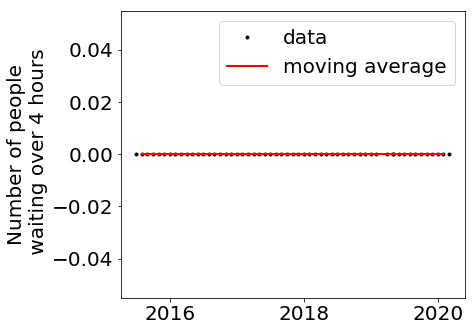

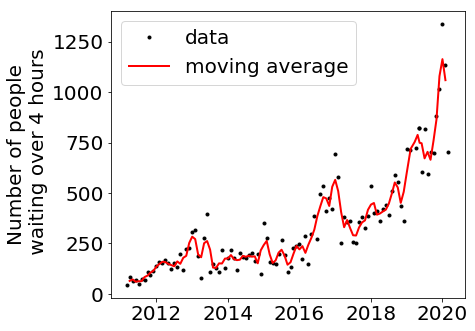

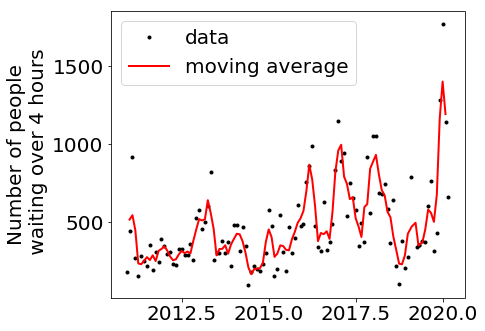

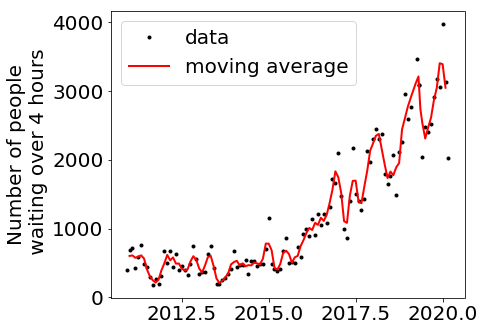

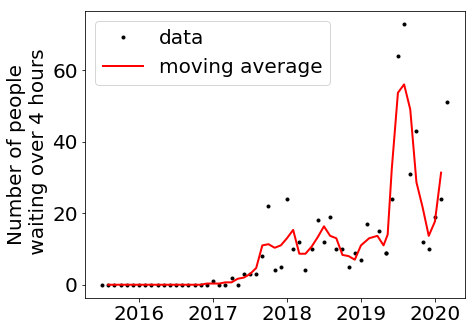

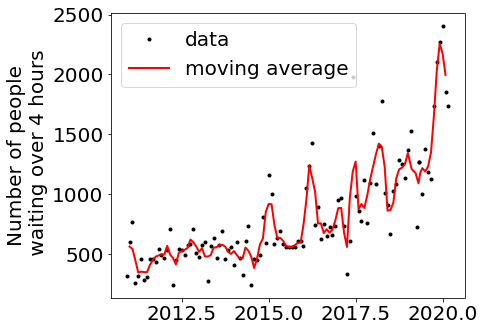

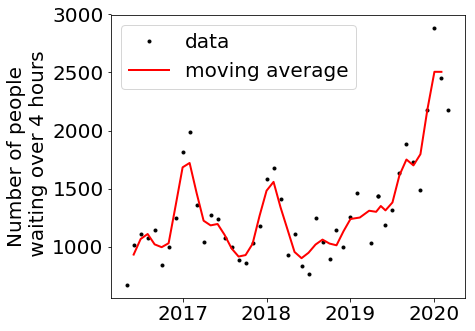

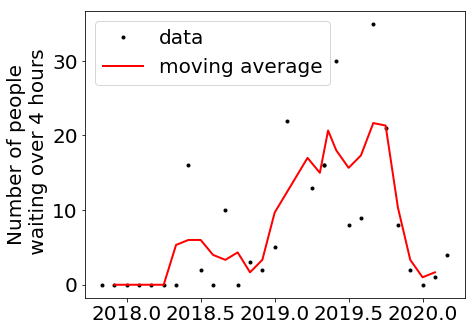

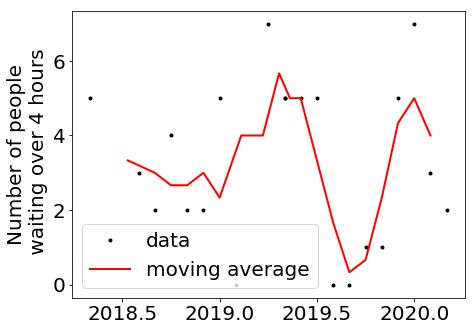

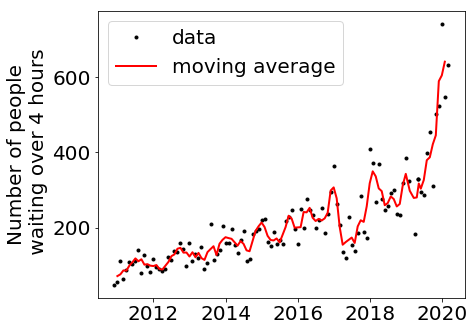

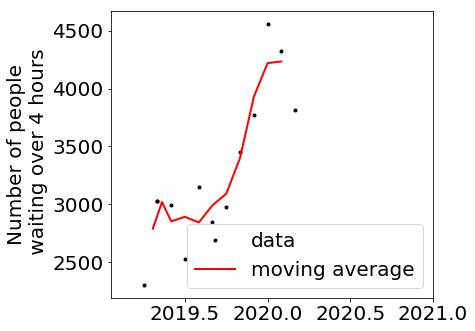

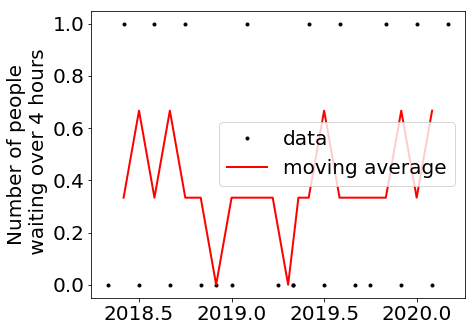

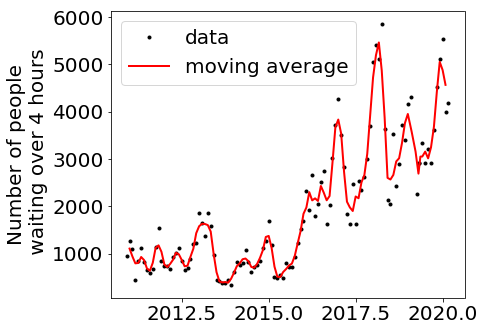

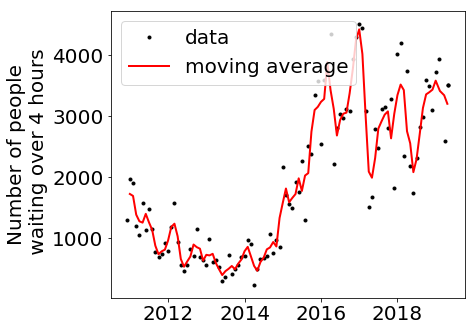

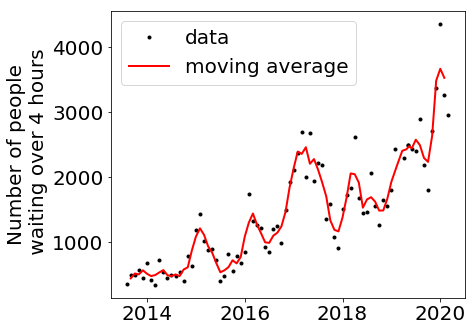

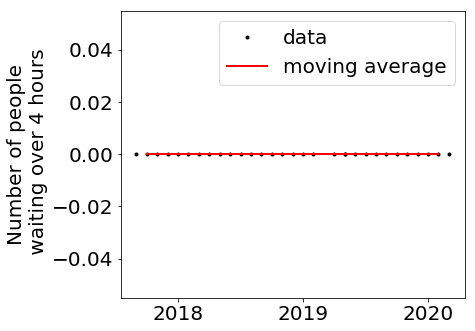

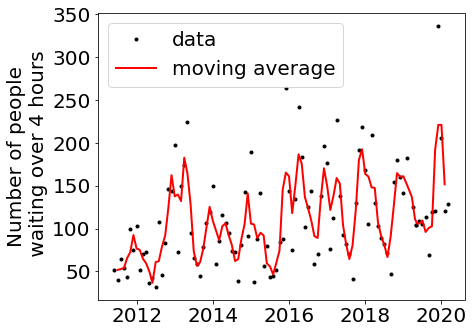

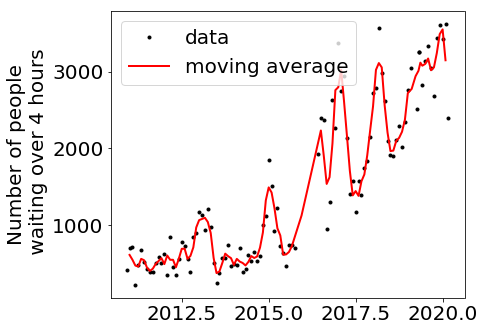

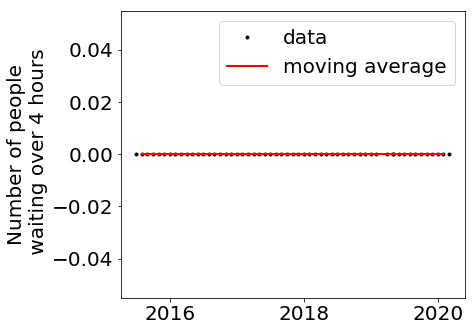

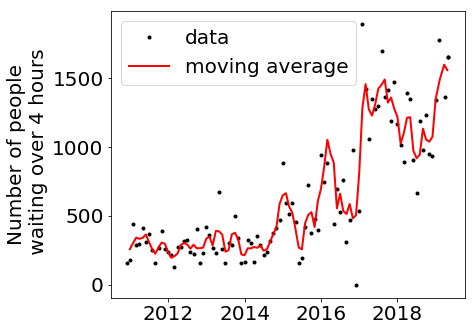

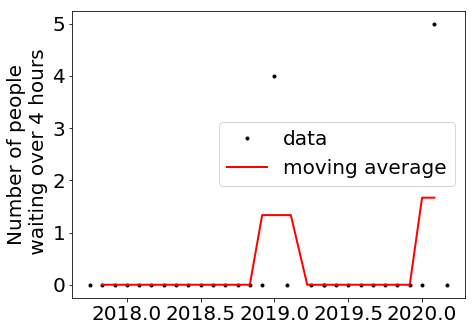

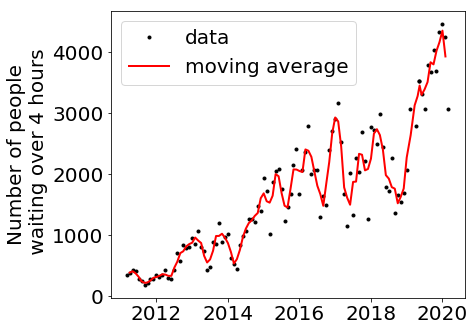

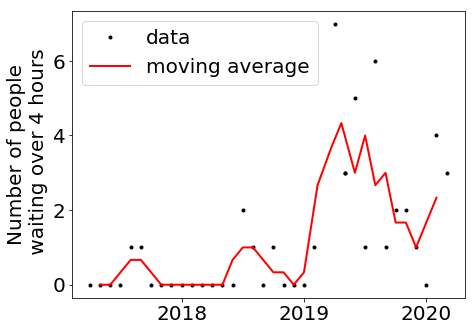

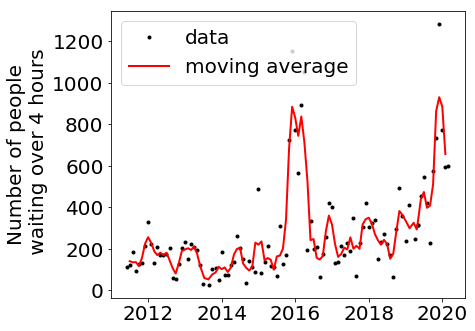

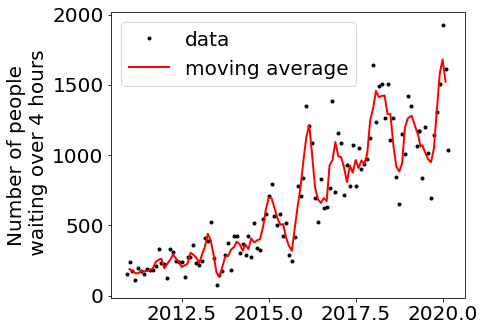

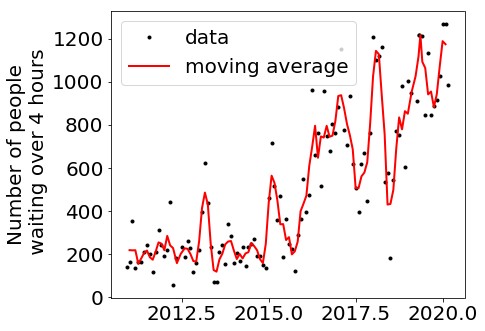

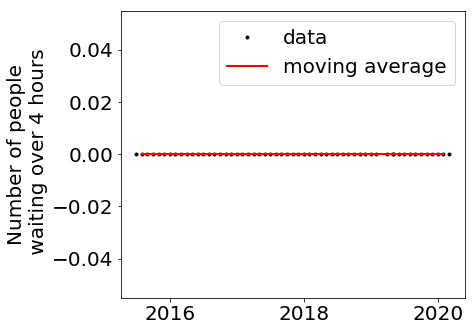

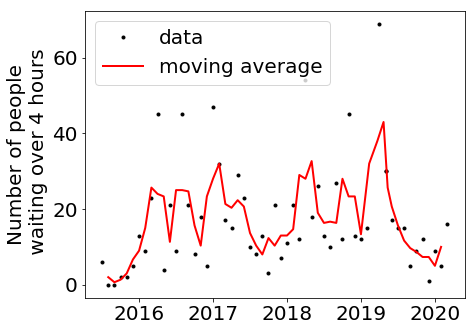

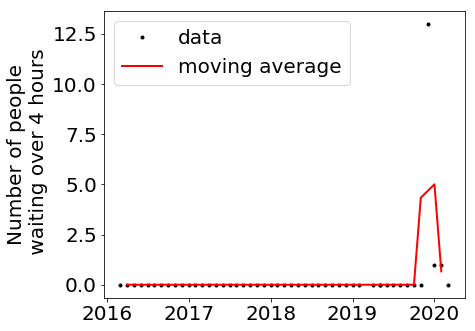

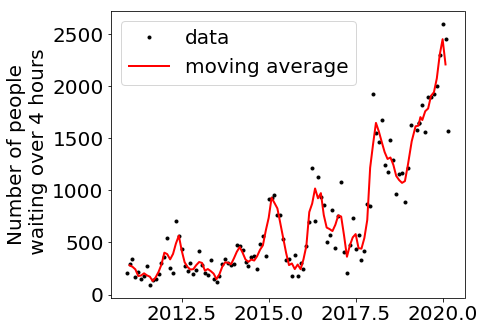

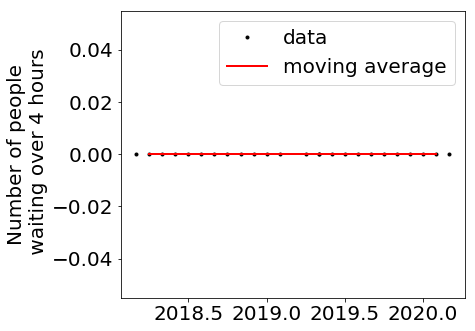

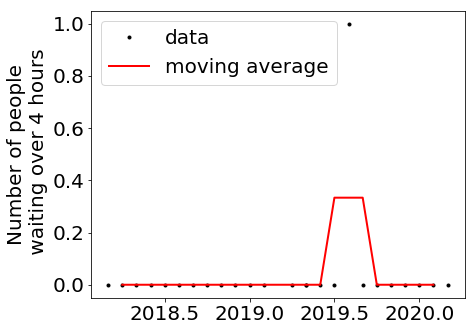

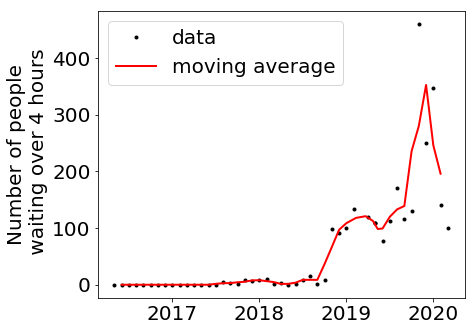

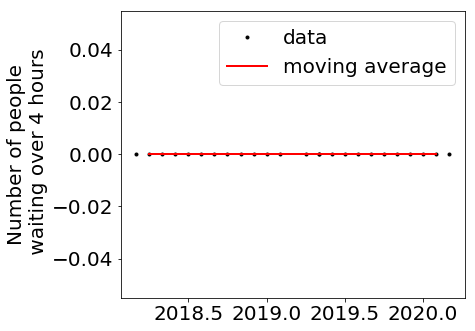

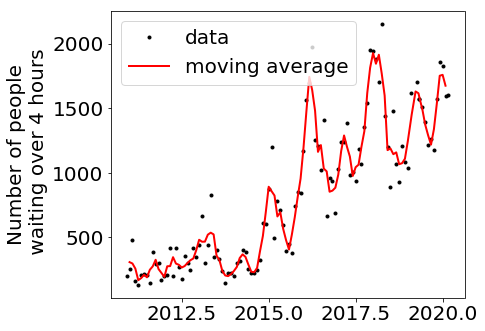

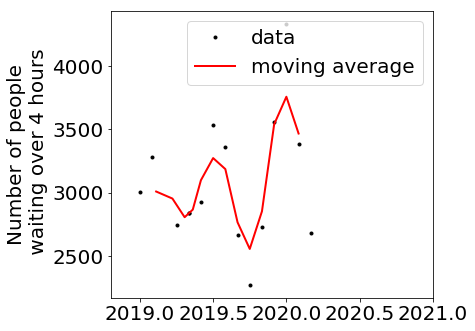

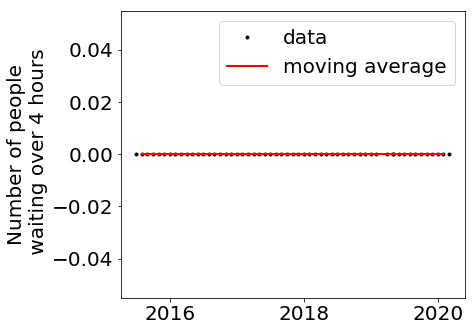

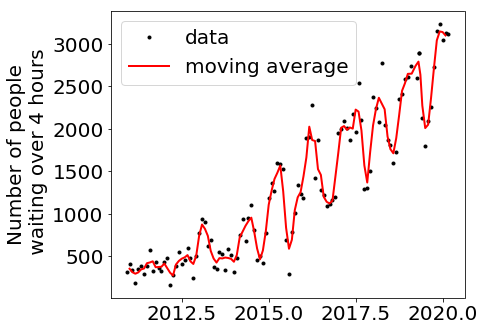

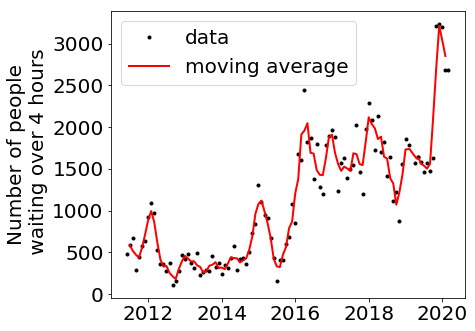

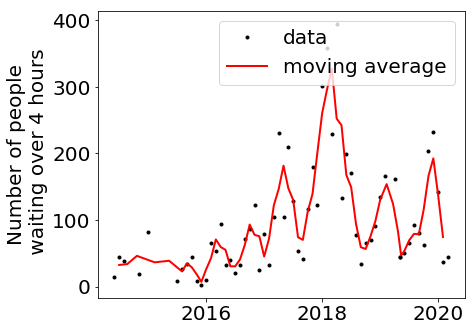

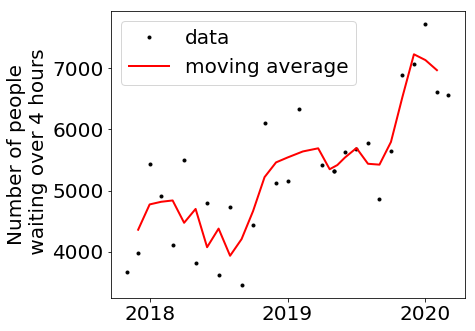

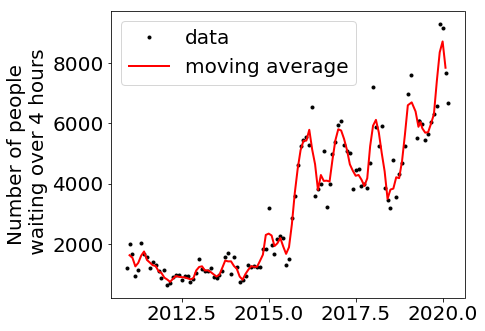

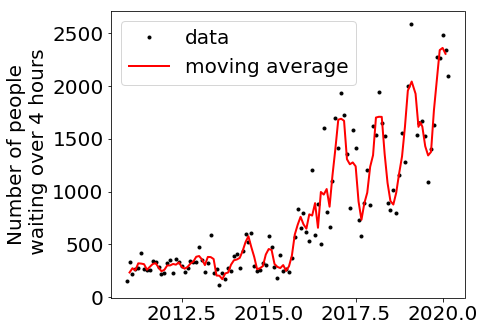

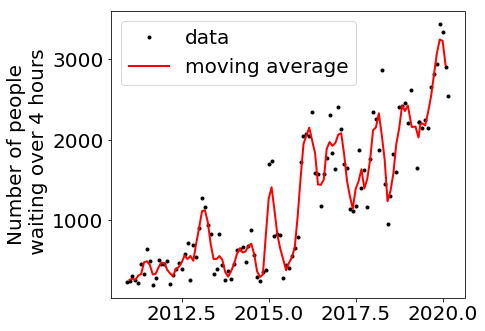

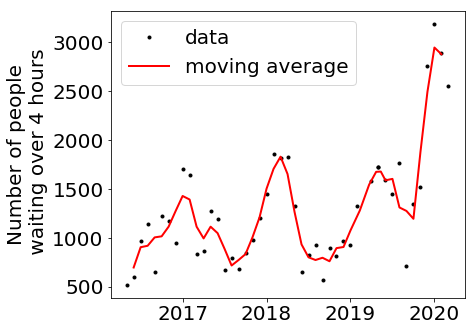

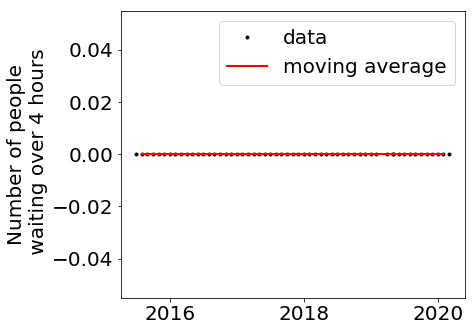

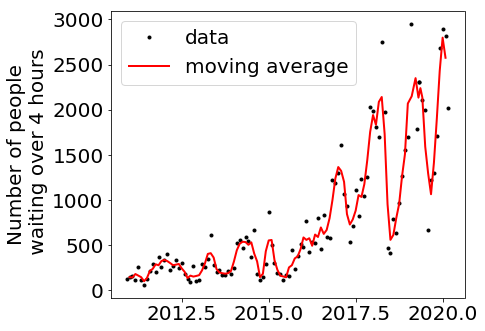

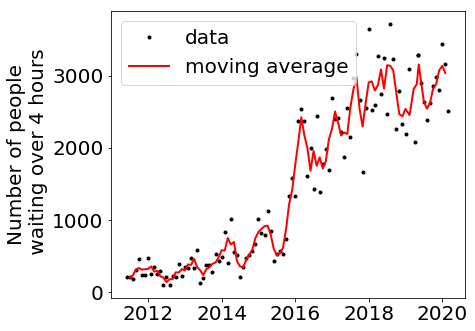

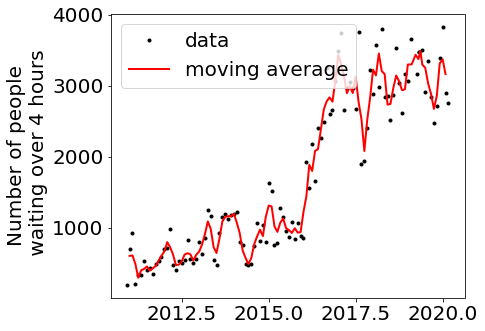

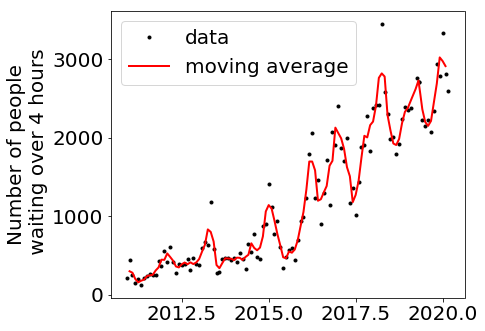

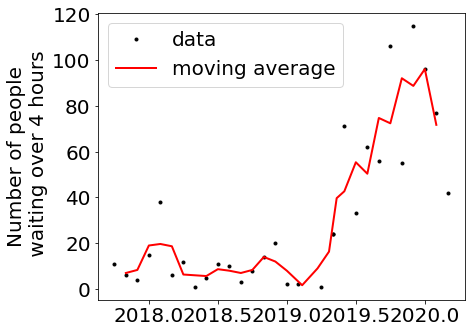

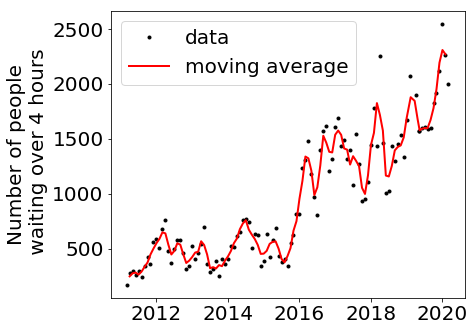

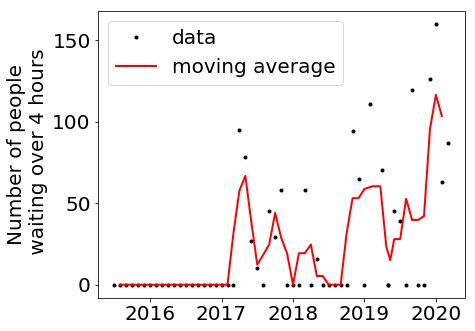

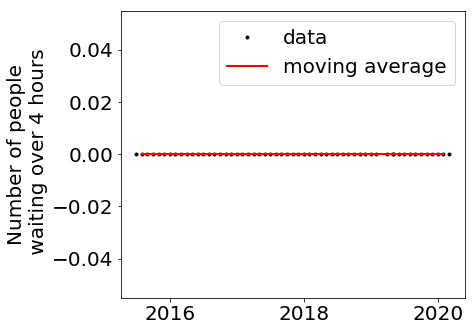

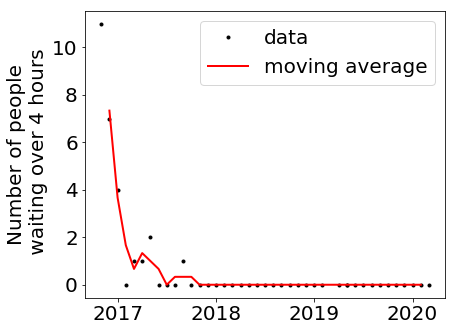

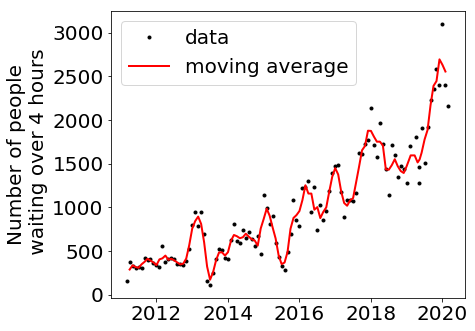

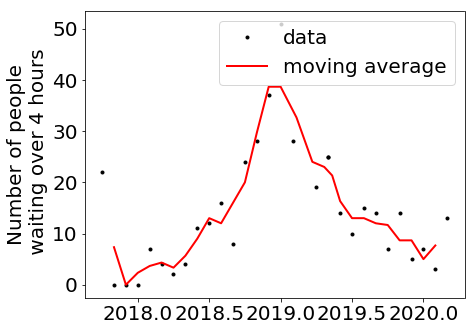

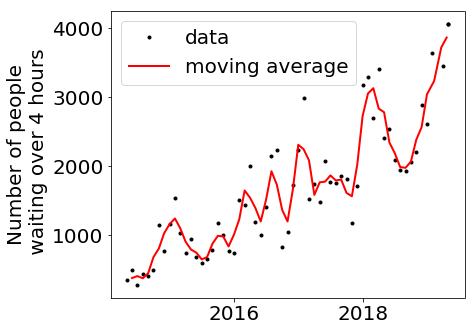

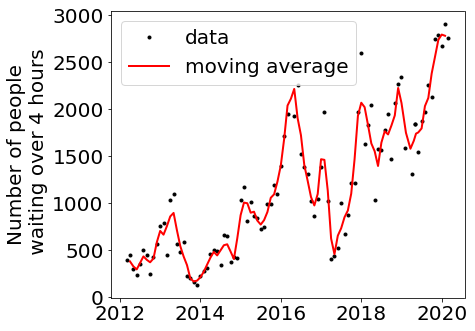

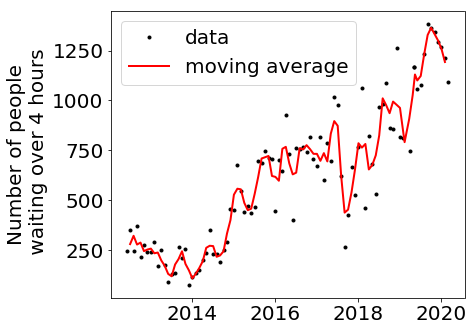

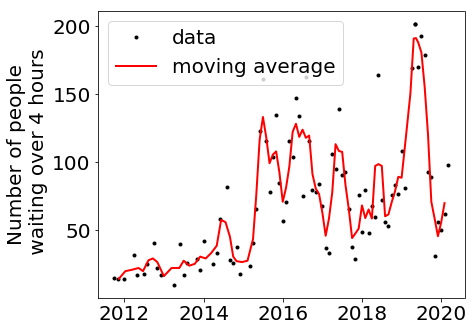

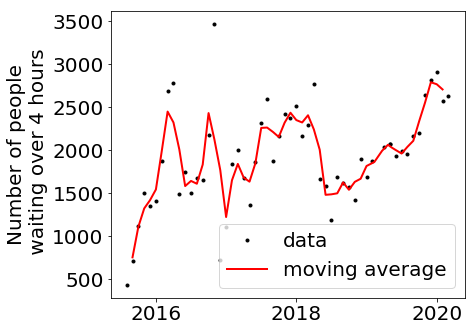

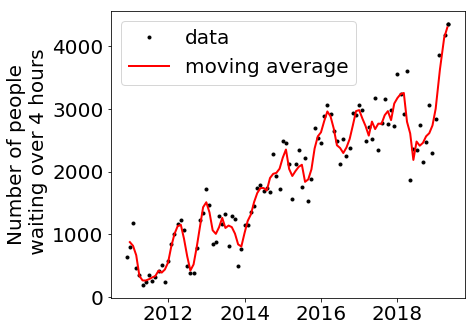

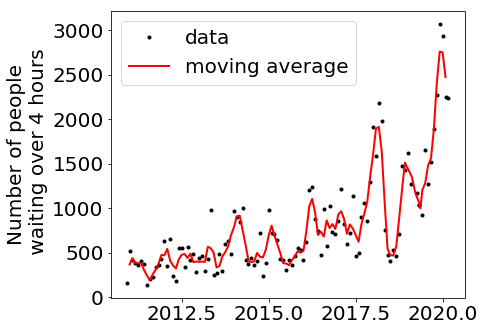

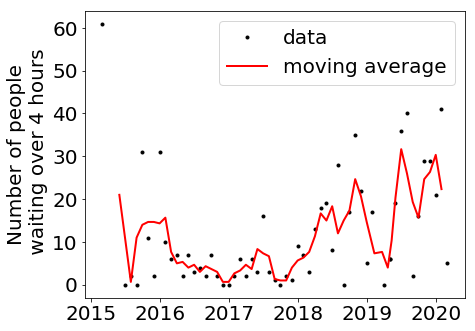

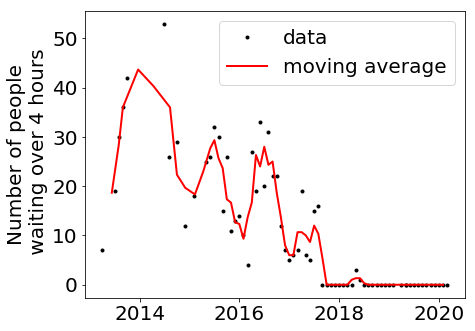

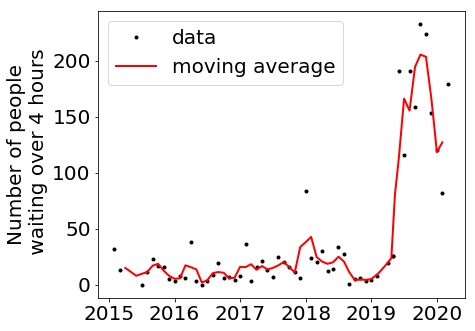

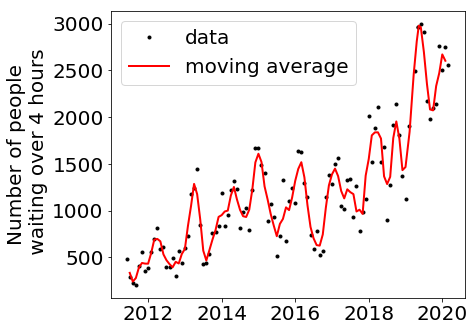

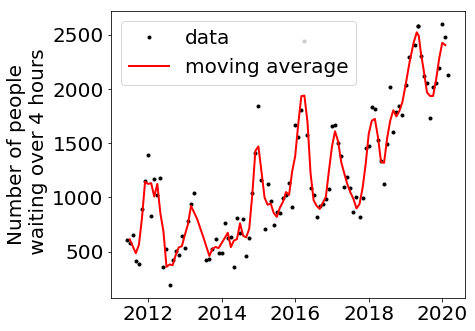

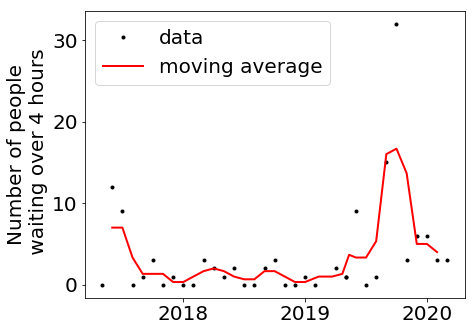

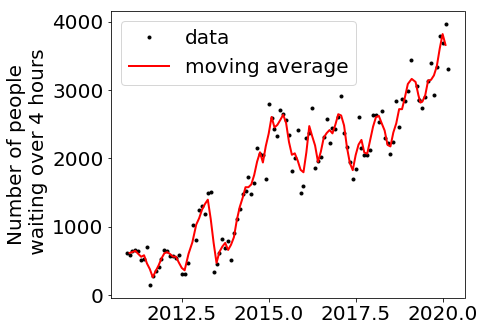

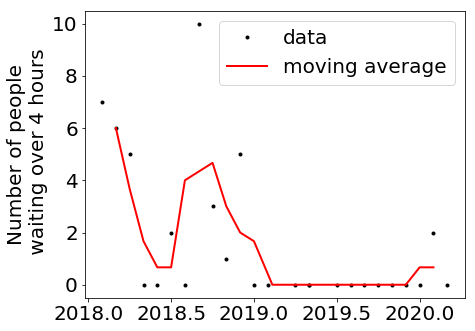

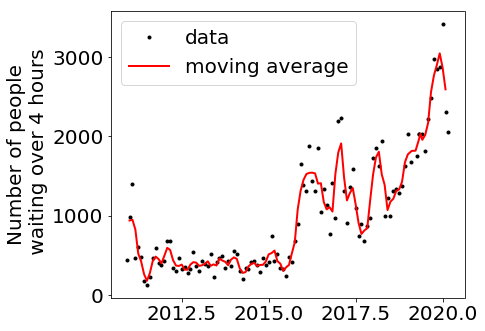

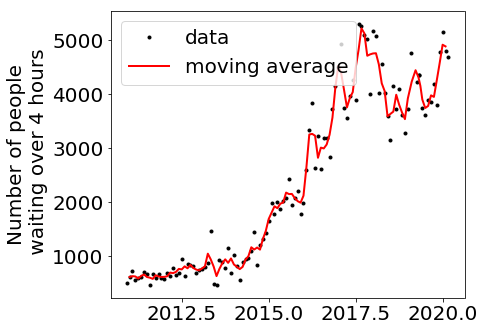

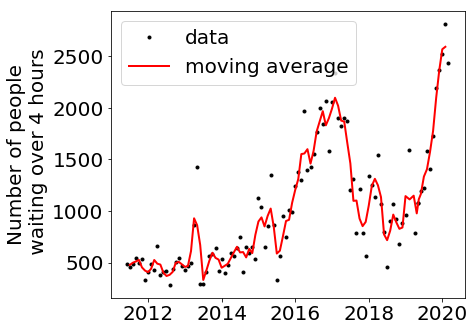

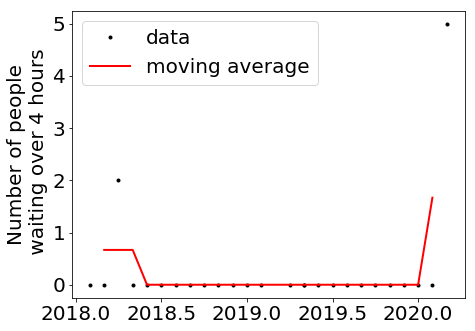

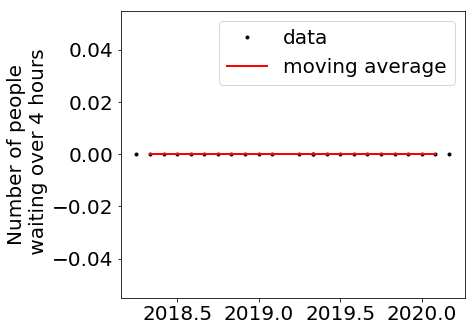

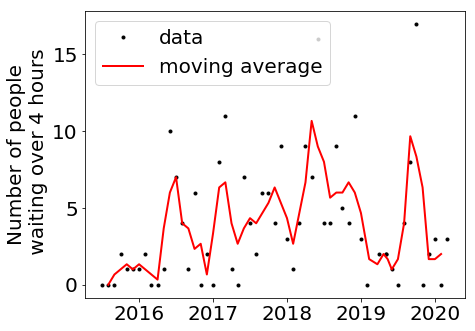

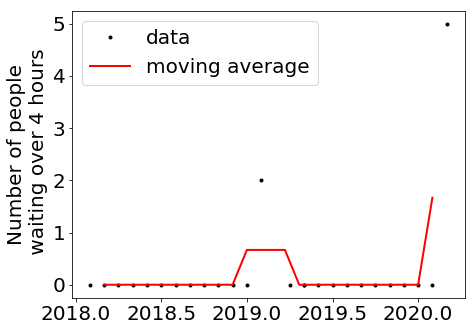

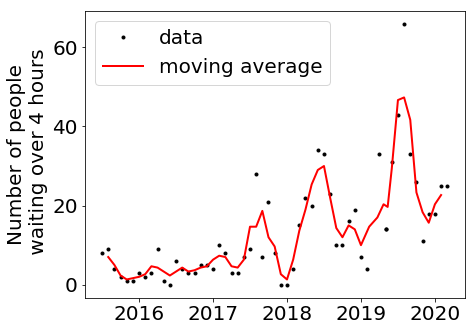

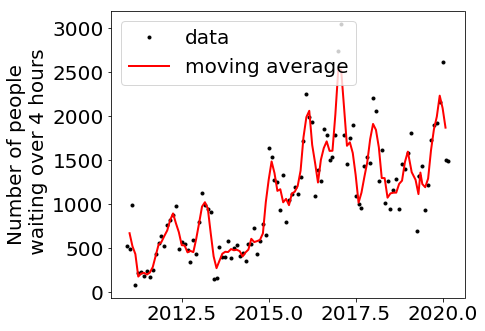

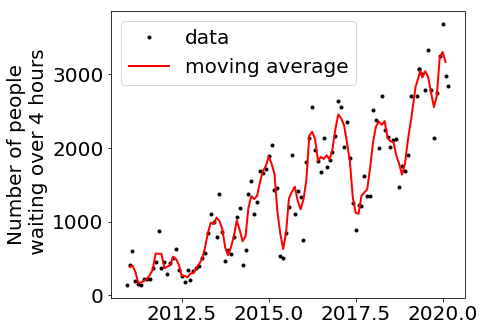

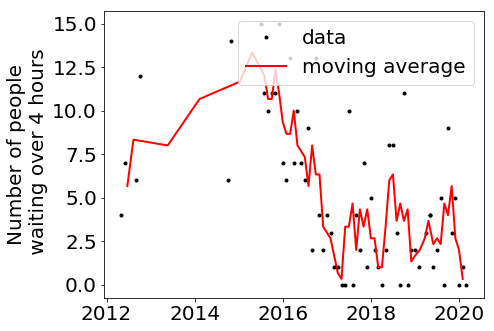

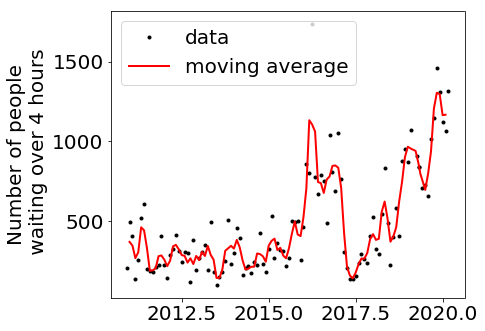

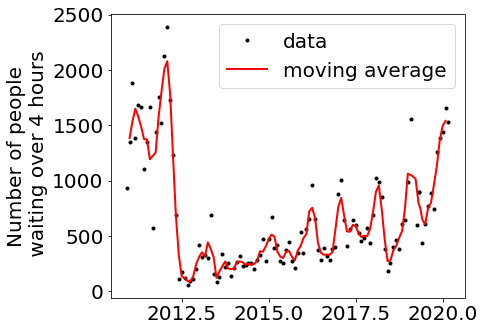

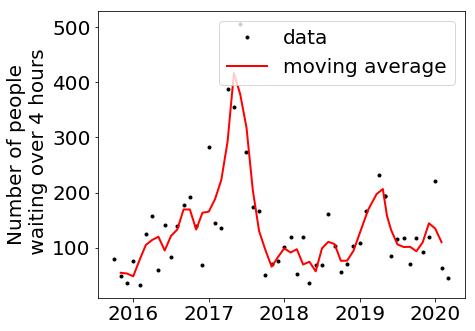

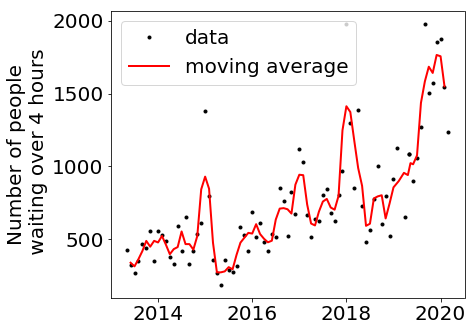

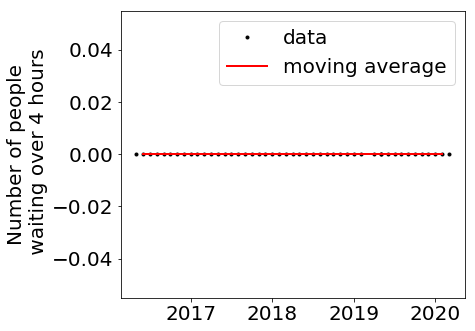

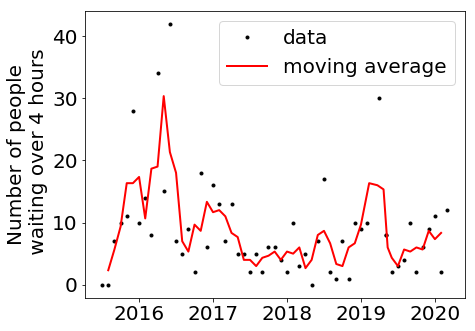

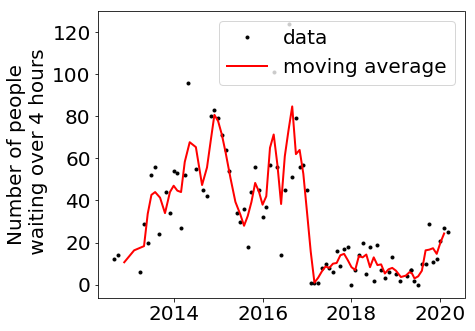

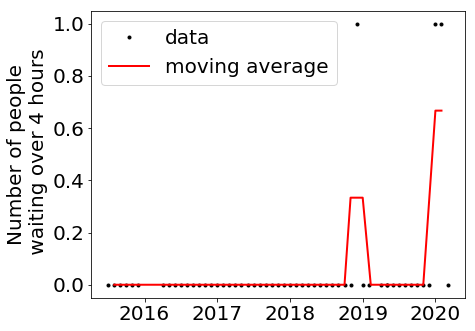

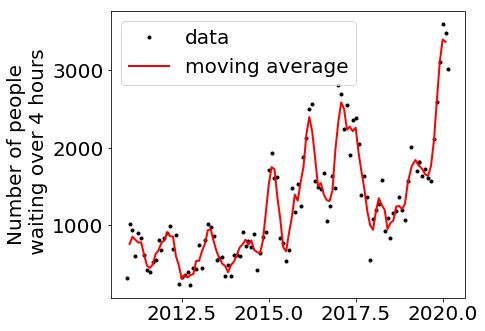

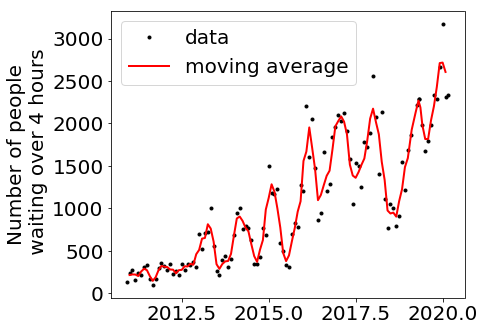

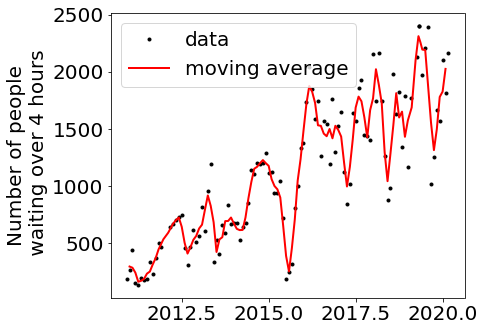

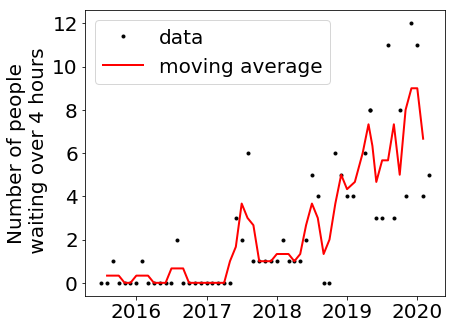

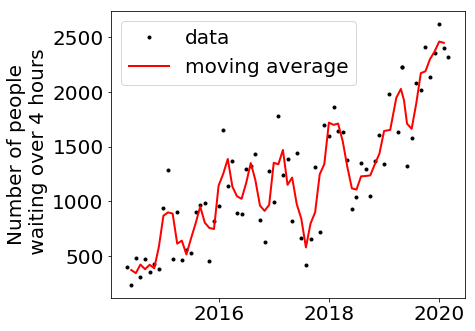

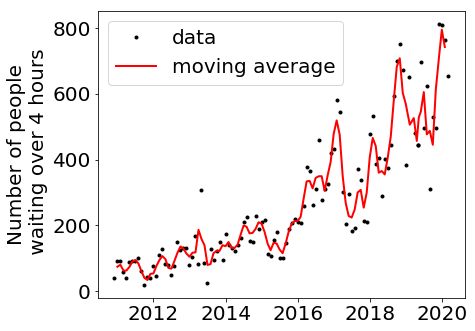

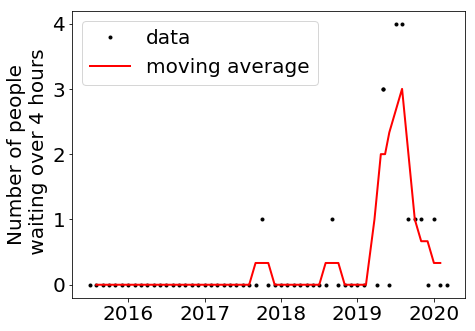

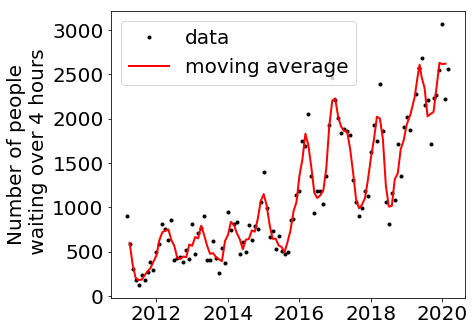

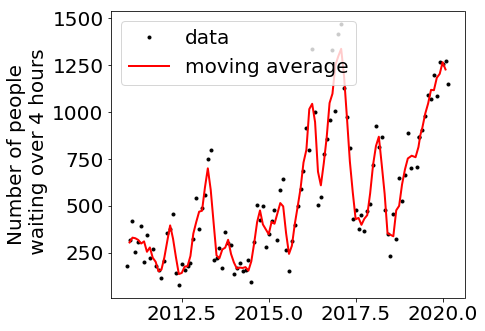

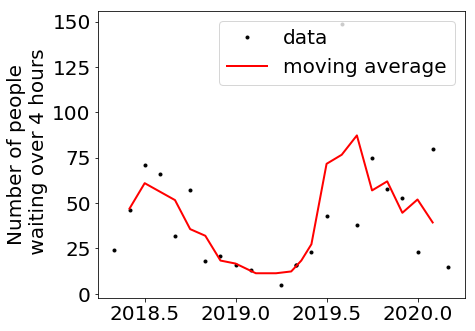

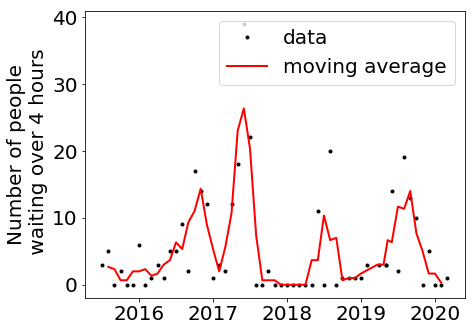

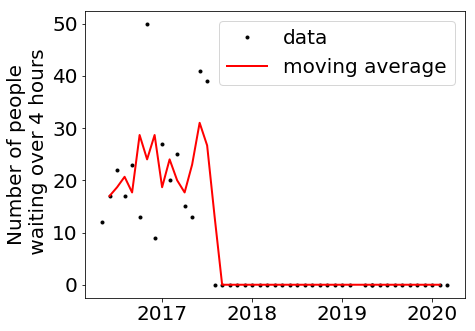

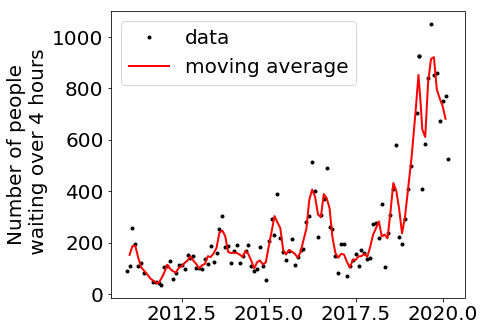

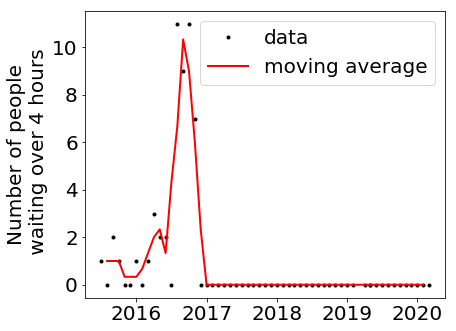

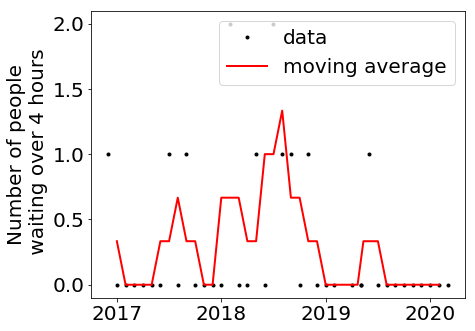

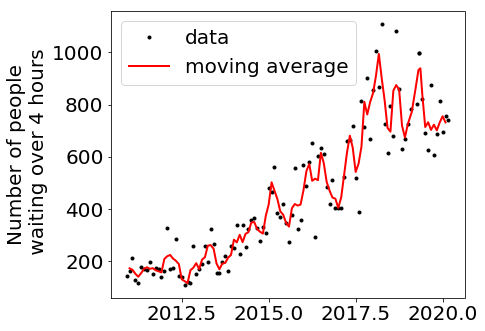

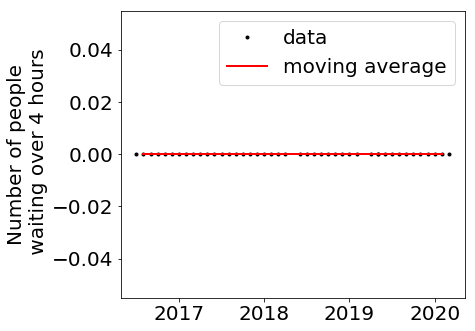

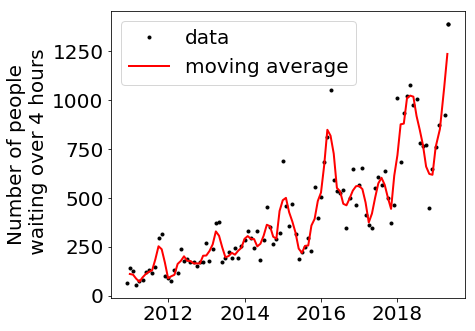

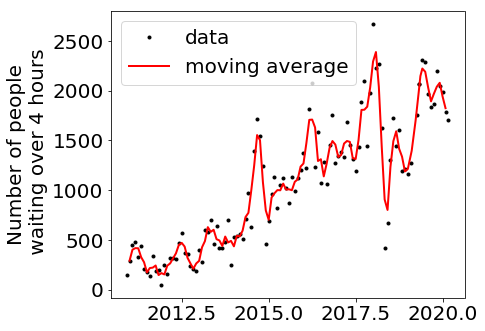

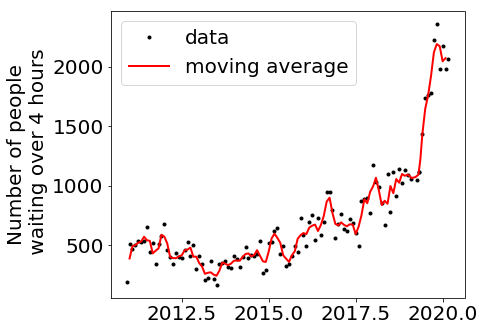

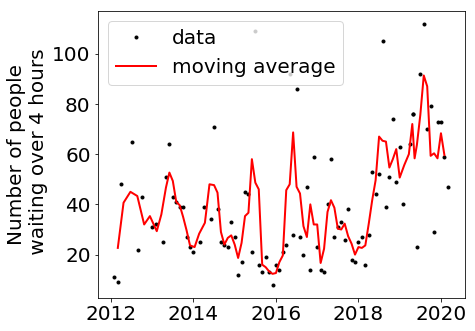

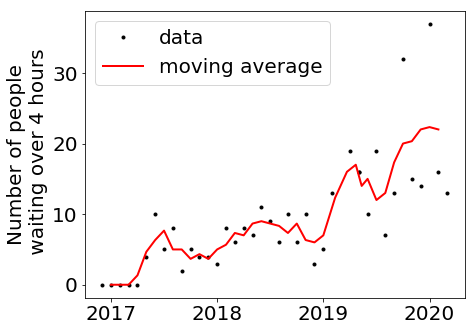

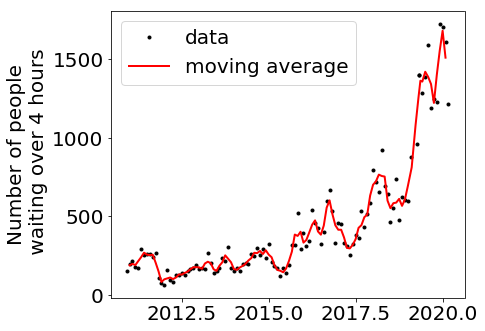

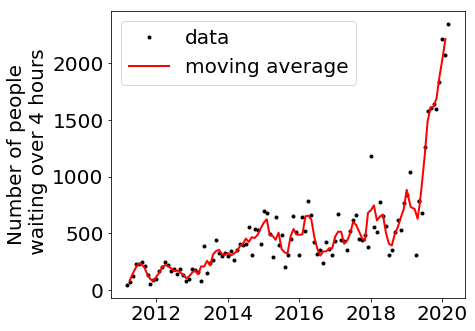

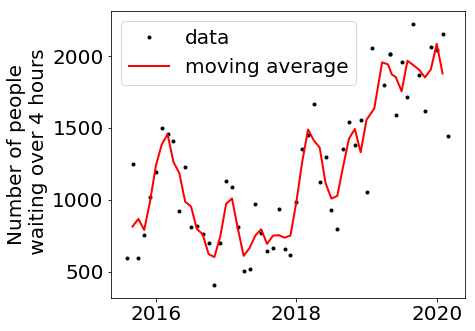

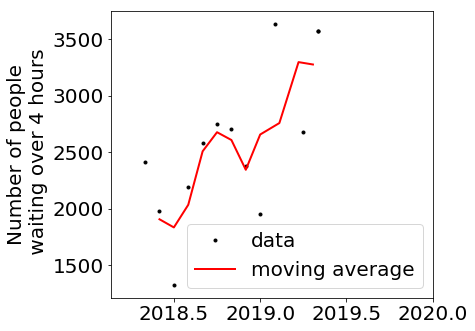

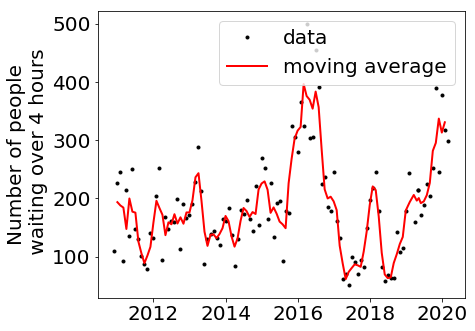

In [3]:
generate = True
if generate == True:
    str2num = np.vectorize(float)
    intvec = np.vectorize(int)
    import matplotlib
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'sans-serif'
    matplotlib.rc('font', size=20)

    # Plot and save the data

    for i, name in enumerate(names[:]):
        if type(name) == str:
            mask = (waiting[i,:] != '-')
            if name == "England":
                NumWaiting = intvec(str2num(waiting[i,:][mask]))
                fig = plt.figure(figsize=(7,5))
                plt.plot(dates[mask], NumWaiting/1e6,'k.',lw=3,label="data")
                plt.plot(movingAverage(dates[mask]), movingAverage(NumWaiting/1e6), 'r-',label="moving average",lw=2)
                plt.ylabel("Number of people\n waiting over 4 hours (million)")
                figName = '_'.join(name.lower().split(' '))
                if abs(dates[mask][0]-dates[mask][-1])<1.5:
                    print("Small", name)
                    plt.xlim([min(dates[mask])-0.2, np.floor(max(dates[mask]))+1])
                plt.legend()
                plt.tight_layout()
                plt.savefig("figures/{}.png".format(figName))
            elif sum(mask)>10:
                NumWaiting = intvec(str2num(waiting[i,:][mask]))
                fig = plt.figure(figsize=(7,5))
                plt.plot(dates[mask], NumWaiting,'k.',lw=3,label="data")
                plt.plot(movingAverage(dates[mask]), movingAverage(NumWaiting), 'r-',label="moving average",lw=2)
                plt.ylabel("Number of people\n waiting over 4 hours")
                figName = '_'.join(name.lower().split(' '))
                if abs(dates[mask][0]-dates[mask][-1])<1.5:
                    print("Small:", name)
                    plt.xlim([min(dates[mask])-0.2, np.floor(max(dates[mask]))+1])
                plt.legend()
                plt.tight_layout()
                plt.savefig("figures/{}.png".format(figName))
    

In [4]:
engWaiting = movingAverage(waiting[0,:][waiting[0,:] != '-'])

<h2>Get List of urls for each hospital</h2>

In [5]:
hospitalLinksList = []
for i, name in enumerate(names):
    if type(name) == str:
        mask = (waiting[i,:] != '-')
        if name == "Herts Urgent Care (Ascots Lane)":
            print(sum(mask))
        if sum(mask)>12:
            url_prefix = '_'.join(name.lower().split(' '))
            url = ''.join(["hospitals/",url_prefix,".html"])
            hospitalLinksList.append("<li><a href=\"{}\">{}</a></li>\n".format(url,name))
    
hospitalLinks = ''.join(hospitalLinksList)

12


<h2>Make homepage</h2>

In [6]:
siteURL = "https://howsmynhs.co.uk/"

testHTML1 = '''
<html>
<head>

<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-154345093-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-154345093-1');
</script>

<title>How's my NHS?</title>
<link rel="stylesheet" type="text/css" href="style.css">

</head>
<body>
<div class="maintitle">
<h1><center><a href="index.html"><img src="logo.png" alt="How's my NHS?" /></a></center></h1>
</div>

<div align="center">
<input type="text" id="myInput" onkeyup="myFunction()" placeholder="Search for hospital...">
</br>

</br></br>
<ul id="myUL">'''

testHTML2 = '''
</ul> 
</div>

<script>
function myFunction() {
    // Declare variables
    var input, filter, ul, li, a, i;
    input = document.getElementById('myInput');
    filter = input.value.toUpperCase();
    ul = document.getElementById("myUL");
    li = ul.getElementsByTagName('li');

    if(input.value.length == 0){
        ul.style.display = "none";
        return;
    }else{
        ul.style.display = "block";
    }
    // Loop through all list items, and hide those who don't match the search query
    for (i = 0; i < li.length; i++) {
        a = li[i].getElementsByTagName("a")[0];
        if (a.innerHTML.toUpperCase().indexOf(filter) > -1) {
            li[i].style.display = "block";
        } else {
            li[i].style.display = "none";
        }
    }
}
</script>

</body>
</html>
''' 

file = open("index.html", "w") 

file.write(''.join([testHTML1, hospitalLinks, testHTML2])) 
 
file.close() 

<h2>Make all the other pages</h2>

In [17]:
headHTML = '''
<html>
<head>

<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-154345093-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-154345093-1');
</script>


<title>How's my NHS?</title>
<link rel="stylesheet" type="text/css" href="../style.css">

</head>
<body>
<div class="maintitle">
<h1><center><a href="../index.html"><img src="../logo.png" alt="How's my NHS?" /></a></center></h1>
</div>'''

tailHTML = '''
</body>
</html>'''

whatNextHTML = '''
    </br>
    <h2 class = \"subtitle\"><center>What Next?</center></h2>\n
    <div class ="box">

    <p><b style="color:#b30000;">Stay at home:</b> Right now we only ask this. With the outbreak of the Coronavirus (COVID-19)
    the NHS is under more pressure than ever. We <b>need</b> to do everything we can to slow it's
    spead. Follow the official government guidance: 
    <ul>
    <li>Only go outside for food, health reasons or work (but only if you cannot work from home)</li>
    <li>Stay 2 metres (6ft) away from other people</li>
    <li>Wash your hands as soon as you get home</li>
    </ul>
    Many young people experience few to no symptoms at all but can still carry the virus and pass 
    it on to more vulnerable people.
    </p>
    <p>
    Stay informed with reliable source such as the governments 
    <a href="https://www.gov.uk/coronavirus" target="_blank">offical Coronavirus page</a>.
    </p> 
    
    <img src="../stayathome.png" alt="Stay at Home, Protect the NHS, Save Lives" /></a>
'''

KeepOutForCorona = '''
    <p><b style="color:#005EB8;">Share the message:</b> Fight for change. Let your friends and family know that the Conservatives 
    are not the party for the NHS. One vote may have little impact, particularly with our broken electoral system. 
    But together we can bring about great change.</p> 

<div id="share-buttons" align="center" style="color:#ffffff;">
    
    <!-- Twitter -->
    <a href="https://twitter.com/share?url=https://howsmynhs.co.uk/&amp;text=How%20has%20YOUR%20NHS%20changed%20under%20the%20Tories?&amp;hashtags=NHS"target="_blank">
    <img src="https://simplesharebuttons.com/images/somacro/twitter.png" alt="Twitter" /></a>
    
    <!-- Email -->
    <a href="mailto:?Subject=Simple Share Buttons&amp;Body=How%20has%20YOUR%20NHS%20changed%20under%20the%20Tories?%20 https://howsmynhs.co.uk/">
    <img src="https://simplesharebuttons.com/images/somacro/email.png" alt="Email" /></a>
 
    <!-- Facebook -->
    <a href="http://www.facebook.com/sharer.php?u=https://howsmynhs.co.uk/" target="_blank">
    <img src="https://simplesharebuttons.com/images/somacro/facebook.png" alt="Facebook" /></a>
    
    <!-- Reddit -->
    <a href="http://reddit.com/submit?url=https://howsmynhs.co.uk/&amp;title=How has your NHS changed under the Tories?" target="_blank">
    <img src="https://simplesharebuttons.com/images/somacro/reddit.png" alt="Reddit" /></a>

    <!-- Tumblr-->
    <a href="http://www.tumblr.com/share/link?url=https://howsmynhs.co.uk/.com&amp;title=Simple Share Buttons" target="_blank">
    <img src="https://simplesharebuttons.com/images/somacro/tumblr.png" alt="Tumblr" /></a>
    
    <!-- LinkedIn -->
    <a href="http://www.linkedin.com/shareArticle?mini=true&amp;url=https://howsmynhs.co.uk/" target="_blank">
    <img src="https://simplesharebuttons.com/images/somacro/linkedin.png" alt="LinkedIn" /></a>
    
   <! -- Share buttons from: https://simplesharebuttons.com/html-share-buttons/ --!>
</div>

    <p><b style="color:#005EB8;">Email your MP:</b> Enter your postcode 
    <a href="https://members.parliament.uk/" target="_blank">here</a>.
    to find the email address for your local MP. Send them this graph of 
    how <b>your</b> local A&E has changed and urge them to use their power to
    protect it from further damage and to restore our NHS to it's former 
    glory.
    </p>

    <p><b style="color:#005EB8;">Use this data:</b> All of the data presented here, as well as the code used to collect it, is <a href="https://github.com/David-Ellis/NHSdata" target="_blank"> freely availble via github</a>. 
    You don't need to cite us. This is all publically available data from <a href="https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/" target="_blank">NHS England</a>. 
    </p>    
    '''

#<a href="https://twitter.com/intent/tweet?screen_name=BorisJohnson&ref_src=twsrc%5Etfw" 
#class="twitter-mention-button" data-show-count="false">Tweet to @BorisJohnson</a>
#<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

#<a href="https://twitter.com/howsmynhs?ref_src=twsrc%5Etfw"
#class="twitter-follow-button" data-show-count="false">Follow @HowsMyNHS</a>
#<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [16]:
hospitalLinksList = []

attendance = NHSdata[2]
waiting = NHSdata[3]

for i, name in enumerate(names):
    if i == 0:
        url_prefix = '_'.join(name.lower().split(' '))
        url = ''.join([url_prefix,".html"])
        file = open("hospitals/{}".format(url), "w")
        figName = '_'.join(name.lower().split(' '))
        path = "../figures/{}.png".format(figName)
        #print("figures/{}.png".format(figName))
        subTitleHTML = "\n<h2 class = \"subtitle\"><center>All of England</center></h2>\n"
        
        imgHTML = '''<div class = \"box\">
        <div class=\"column1\">
        <img src=\"{}\" alt=\"{}\">
        </div>
        '''.format(path, name)
        
        supTextHTML = u'''<div class =\"column2\">
            <p>After nearly a decade of Conservative rule, each month over <b>400,000</b> more people are made to wait
            <b>over four hours</b> to be seen at A&E than in 2011. That's an increase of over <b>900%</b>. 
            The number of people attending A&E, however, has only increased by less than 30%. <p>
            
            <p>Now, Brexit and a trade deal with Trump's US threatens to increase the NHS drug bill from &pound18 billion to as much 
            as <b>&pound45 billion</b> a year while shutting out the nurses, carers and other workers that the health service depends on.</p>
            
            </div>\n</div>'''
        
        
        file.write(''.join([headHTML,subTitleHTML,imgHTML,supTextHTML,whatNextHTML,tailHTML]))
        file.close() 
    elif sum(attendance[i,:] != '-')>=12:
        url_prefix = '_'.join(name.lower().split(' '))
        url = ''.join([url_prefix,".html"])
        file = open("hospitals/{}".format(url), "w")
        figName = '_'.join(name.lower().split(' '))
        path = "../figures/{}.png".format(figName)
        #print("figures/{}.png".format(figName))
        subTitleHTML = "\n<h2 class = \"subtitle\"><center>{}</center></h2>\n".format(name)
        imgHTML = '''<div class = \"box\">
        <div class=\"column1\">
        <img src=\"{}\" alt=\"{}\">
        
        </div>
        '''.format(path, name)
        
        smoothWait = movingAverage(waiting[i,:][waiting[i,:] != '-'])
        avAtt = np.mean(attendance[i,:][attendance[i,:] != '-'])
        sampleDates = dates[waiting[i,:] != '-']
        if max(smoothWait) < 15 and avAtt<2000:
            supTextHTML = '''<div class =\"column2\">
            <p>It looks like things haven't changed much for your hospital! On average only {} people attend this A&E 
            each month.</p>
            <p>Unfortunately, things aren't so great for the rest of England. After nearly a decade of Conservative rule,
            each month over <b>400,000</b> more people are made to wait <b>over four hours</b> to be seen at A&E than 
            in {}.
            
            <p>Now, Brexit and a trade deal with Trump's US threatens to increase the NHS drug bill from &pound18 billion to as much 
            as <b>&pound45 billion</b> a year while shutting out the nurses, carers and other workers that the health service depends on.</p>
            
            </div>\n</div>'''.format(int(avAtt), int(round(min(sampleDates))))
            
        elif max(smoothWait) < 15:
            supTextHTML = '''<div class =\"column2\">
            <p> It looks like things haven't changed much for your hospital!</p>
            <p>Unfortunately, things aren't so great for the rest of England. After nearly a decade of Conservative rule,
            each month over <b>400,000</b> more people are made to wait <b>over four hours</b> to be seen at A&E than in 2011.
            
            <p>Now, Brexit and a trade deal with Trump's US threatens to increase the NHS drug bill from &pound18 billion to as much 
            as <b>&pound45 billion</b> a year while shutting out the nurses, carers and other workers that the health service depends on.</p>
            
            </div>\n</div>'''.format(int(avAtt))
            
        elif avAtt>2000 and smoothWait[0]-smoothWait[-1]>100:
            diff = smoothWait[0]-smoothWait[-1]
            supTextHTML = '''<div class =\"column2\">
            <p>After nearly a decade of Conservative rule, on average, <b>{}</b> more people are being left to wait over 
            four hours at A&E at <b>your</b> hospital than back in {}.</p>
            <p>And things are bad for the rest of England too. Each month over <b>400,000</b> more people are made to wait
            <b>over four hours</b> to be seen at A&E than in 2011.
            <p>Now, Brexit and a trade deal with Trump's US threatens to increase the NHS drug bill from &pound18 billion to as much 
            as <b>&pound45 billion</b> a year while shutting out the nurses, carers and other workers that the health service depends on.</p>

            </div>\n</div>'''.format(int(diff),int(np.floor(min(sampleDates))))
        else:
            print(name)
            supTextHTML = '''
            <div class =\"column2\">
            <p> The data show's that thing's have gotten worse in your hospital. With {} more people each month 
             being forced to wait over 4 hours to be seen at A&E since {}. It many English hospitals, the situation is much
             worse. </p> 
             <p>After nearly a decade of Conservative rule, each month over <b>400,000</b> more people are made 
             to wait <b>over four hours</b> to be seen at A&E than in 2011.</p>
             
            <p>Now, Brexit and a trade deal with Trump's US threatens to increase the NHS drug bill from &pound18 billion to as much 
            as <b>&pound45 billion</b> a year while shutting out the nurses, carers and other workers that the health service depends on.</p>
            
            </div>\n</div>
            '''.format(int(diff), int(np.floor(min(sampleDates))))
        

        
        file.write(''.join([headHTML,subTitleHTML,imgHTML,supTextHTML,whatNextHTML,tailHTML]))
        file.close() 

Hertfordshire Community NHS Trust
Beckenham Beacon Ucc
Moorfields Eye Hospital NHS Foundation Trust
North East London NHS Foundation Trust
Corby Urgent Care Centre
Dhu Health Care C.I.C
Nottingham Citycare Partnership
Bransholme Health Centre
East Riding Community Hospital
Sheffield Children's NHS Foundation Trust
Liverpool Women's NHS Foundation Trust
Bridgewater Community Healthcare NHS Foundation Trust
Skelmersdale Walk In Centre
East Berks Primary Care Ooh(Wam)
Oxford Health NHS Foundation Trust
Southampton NHS Treatment Centre
Southern Health NHS Foundation Trust
Ashford Walk-In-Centre
Kent Community Health NHS Foundation Trust
Sussex Community NHS Foundation Trust
Woking Walk In Centre
Bristol Community Health
Wiltshire Health & Care
Yate West Gate Centre
Cornwall Partnership NHS Foundation Trust
Somerset Partnership NHS Foundation Trust
South Western Ambulance Service NHS Foundation Trust
